# Loan Lending Case Study

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import sys

In [2]:
print("Python version:", sys.version)
print("Seaborn version:", sns.__version__)
#print("Matplotlib version:",  matplotlib.pyplot.__version__)
print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)

Python version: 3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]
Seaborn version: 0.12.2
Pandas version: 2.1.4
NumPy version: 1.26.4


In [3]:
pwd

'C:\\Users\\Sourish\\ML AI\\Lending Club Case Study'

In [4]:
# Loading of data file,Please change directory as per your path
#df=pd.read_csv('C:/Users/sabahat.zartar.jamil/Downloads/Sabahat/loan.csv', low_memory=False)
df=pd.read_csv('C:/Users/Sourish/ML AI/Lending Club Case Study/loan.csv', low_memory=False)

In [5]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
#Understand the no of rows and columns in the dataframe 
df.shape

(39717, 111)

In [7]:
df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,39717.0,683131.913060,210694.132915,54734.0,516221.0,665665.0,837755.0,1077501.0
member_id,39717.0,850463.559408,265678.307421,70699.0,666780.0,850812.0,1047339.0,1314167.0
loan_amnt,39717.0,11219.443815,7456.670694,500.0,5500.0,10000.0,15000.0,35000.0
funded_amnt,39717.0,10947.713196,7187.238670,500.0,5400.0,9600.0,15000.0,35000.0
funded_amnt_inv,39717.0,10397.448868,7128.450439,0.0,5000.0,8975.0,14400.0,35000.0
...,...,...,...,...,...,...,...,...
tax_liens,39678.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
tot_hi_cred_lim,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_bal_ex_mort,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_bc_limit,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Checking Null value counts across all columns


df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [11]:
df.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# DATA CLEANING PROCESS

In [12]:
# Convert percentage to numerical
df['int_rate'] = df['int_rate'].str.rstrip('%').astype('float') / 100.0
df['revol_util'] = df['revol_util'].str.rstrip('%').astype('float') / 100.0

In [13]:
df.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,0.1065,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,0.1527,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [14]:
# Convert all dates to datetime
df['issue_d'] = pd.to_datetime(df['issue_d'])
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'])
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'])

In [15]:
df.tail(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39715,90376,89243,5000,5000,650.0,36 months,0.0743,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,0.1375,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: datetime64[ns](4), float64(76), int64(13), object(18)
memory usage: 33.6+ MB


In [17]:
# Copy all columns with data type as int, float, datetime into df_num

df_num=df.select_dtypes(include=['int64','float64','datetime64']) 

In [18]:
df_num.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,issue_d,dti,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,0.1065,162.87,24000.0,2024-12-11,27.65,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,0.1527,59.83,30000.0,2024-12-11,1.00,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,0.1596,84.33,12252.0,2024-12-11,8.72,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,0.1349,339.31,49200.0,2024-12-11,20.00,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,0.1269,67.79,80000.0,2024-12-11,17.94,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [19]:
df_num.shape

(39717, 93)

In [20]:
# Copy all columns with data type as object into df_cat

df_cat=df.select_dtypes('object')

In [21]:
df_cat.head()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,initial_list_status,next_pymnt_d,application_type
0,36 months,B,B2,NaN,10+ years,RENT,Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,f,NaN,INDIVIDUAL
1,60 months,C,C4,Ryder,< 1 year,RENT,Source Verified,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,f,NaN,INDIVIDUAL
2,36 months,C,C5,NaN,10+ years,RENT,Not Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,f,NaN,INDIVIDUAL
3,36 months,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,f,NaN,INDIVIDUAL
4,60 months,B,B5,University Medical Group,1 year,RENT,Source Verified,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,f,16-Jun,INDIVIDUAL


In [22]:
# Checking Null value counts across all columns

df_num.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 93, dtype: int64

In [23]:
df_num.shape

(39717, 93)

In [24]:
df_cat.isnull().sum()

term                       0
grade                      0
sub_grade                  0
emp_title               2459
emp_length              1075
home_ownership             0
verification_status        0
loan_status                0
pymnt_plan                 0
url                        0
desc                   12942
purpose                    0
title                     11
zip_code                   0
addr_state                 0
initial_list_status        0
next_pymnt_d           38577
application_type           0
dtype: int64

In [25]:
df_cat.shape

(39717, 18)

In [26]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [27]:
# Claculate the % of data having null value in respective column in df_num dataframe

df_num_perc=df_num.isnull().mean()*100

In [28]:
#For dispalying the all the columns 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [29]:
df_num_perc

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
int_rate                            0.000000
installment                         0.000000
annual_inc                          0.000000
issue_d                             0.000000
dti                                 0.000000
delinq_2yrs                         0.000000
earliest_cr_line                    0.000000
inq_last_6mths                      0.000000
mths_since_last_delinq             64.662487
mths_since_last_record             92.985372
open_acc                            0.000000
pub_rec                             0.000000
revol_bal                           0.000000
revol_util                          0.125891
total_acc                           0.000000
out_prncp                           0.000000
out_prncp_inv                       0.000000
total_pymn

In [30]:
# Claculate the % of data having null value in respective column in df_cat datafram

df_cat_perc=df_cat.isnull().mean()*100

In [31]:
df_cat_perc

term                    0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               6.191303
emp_length              2.706650
home_ownership          0.000000
verification_status     0.000000
loan_status             0.000000
pymnt_plan              0.000000
url                     0.000000
desc                   32.585543
purpose                 0.000000
title                   0.027696
zip_code                0.000000
addr_state              0.000000
initial_list_status     0.000000
next_pymnt_d           97.129693
application_type        0.000000
dtype: float64

## Remove all the columns which has more than 90% missing

In [32]:
df = df.loc[ : , df.isna().mean(axis = 0) * 100 < 90]

In [33]:
df.shape

(39717, 55)

In [34]:
print(df.isnull().mean()*100)

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.585543
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [35]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12942
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [36]:
## Dropping <<mths_since_last_delinq>> as 65% data are null
df = df.drop('mths_since_last_delinq', axis=1)

In [37]:
df.shape

(39717, 54)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          39717 non-null  int64         
 1   member_id                   39717 non-null  int64         
 2   loan_amnt                   39717 non-null  int64         
 3   funded_amnt                 39717 non-null  int64         
 4   funded_amnt_inv             39717 non-null  float64       
 5   term                        39717 non-null  object        
 6   int_rate                    39717 non-null  float64       
 7   installment                 39717 non-null  float64       
 8   grade                       39717 non-null  object        
 9   sub_grade                   39717 non-null  object        
 10  emp_title                   37258 non-null  object        
 11  emp_length                  38642 non-null  object    

## Impute the missing

In [39]:
## Also creating 2 separate dataframe for numerical and categorical variables separately 

In [40]:
df_num_new=df.select_dtypes(include=['int64','float64','datetime64'])

In [41]:
df_num_new.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,issue_d,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,0.1065,162.87,24000.0,2024-12-11,27.65,0,1985-01-01,1,3,0,13648,0.837,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,2024-01-15,171.62,2024-05-16,0.0,1,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,0.1527,59.83,30000.0,2024-12-11,1.00,0,1999-04-01,5,3,0,1687,0.094,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2024-04-13,119.66,2024-09-13,0.0,1,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,0.1596,84.33,12252.0,2024-12-11,8.72,0,2024-11-01,2,2,0,2956,0.985,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,2024-06-14,649.91,2024-05-16,0.0,1,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,0.1349,339.31,49200.0,2024-12-11,20.00,0,1996-02-01,1,10,0,5598,0.210,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,2024-01-15,357.48,2024-04-16,0.0,1,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,0.1269,67.79,80000.0,2024-12-11,17.94,0,1996-01-01,0,15,0,27783,0.539,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,2024-05-16,67.79,2024-05-16,0.0,1,0,0.0,0,0.0,0.0


In [42]:
df_num_new.shape

(39717, 37)

In [43]:
# Fill the na values with mean of respective column

df_num_new=df_num_new.fillna(df_num_new.mean())

In [44]:
df_num_new.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
int_rate                      0
installment                   0
annual_inc                    0
issue_d                       0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_d                  0
last_pymnt_amnt               0
last_credit_pull_d            0
collections_12_mths_ex_med    0
policy_c

## Dropping the columns which has 0 as value

In [45]:
cols_with_all_zero_rows = df_num_new.columns[(df_num_new == 0).all()]
df_num_new = df_num_new.drop(columns=cols_with_all_zero_rows)
df_num_new.shape

(39717, 32)

In [46]:
df_num_new.isnull().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
int_rate                   0
installment                0
annual_inc                 0
issue_d                    0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_pymnt_d               0
last_pymnt_amnt            0
last_credit_pull_d         0
policy_code                0
pub_rec_bankruptcies       0
dtype: int64

## Outlier Detection

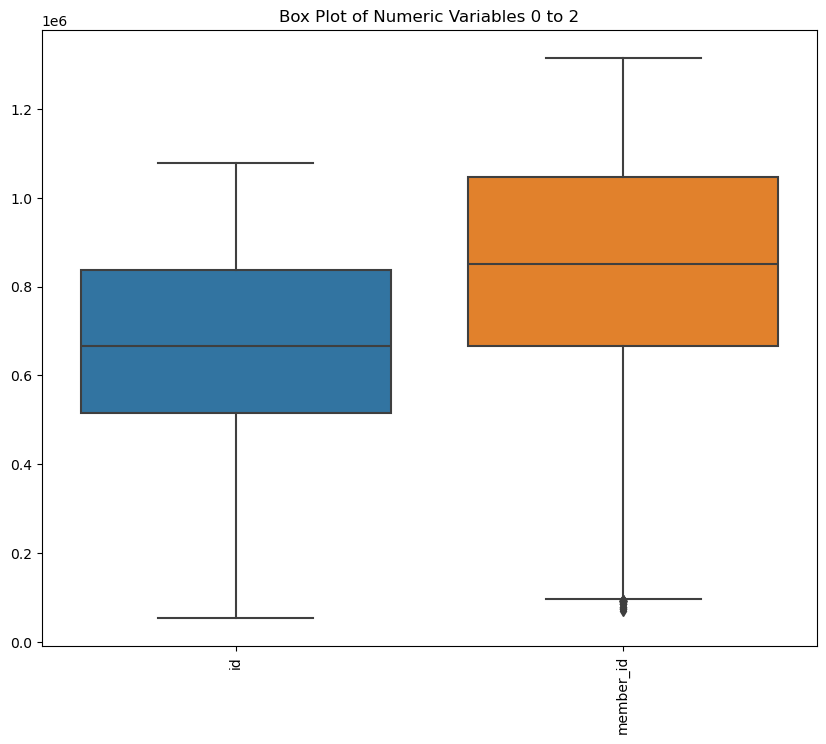

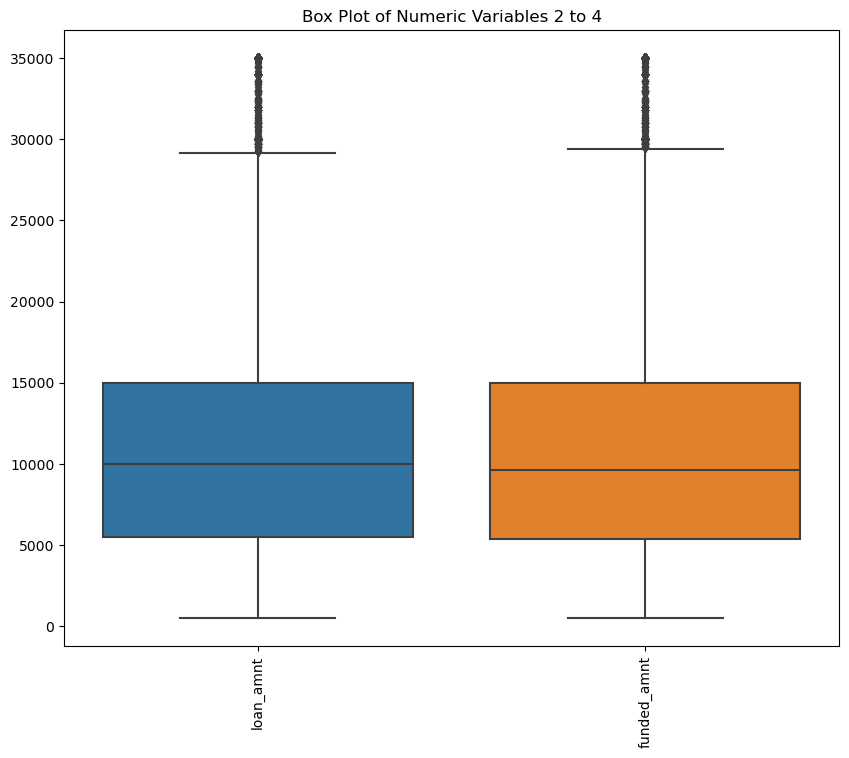

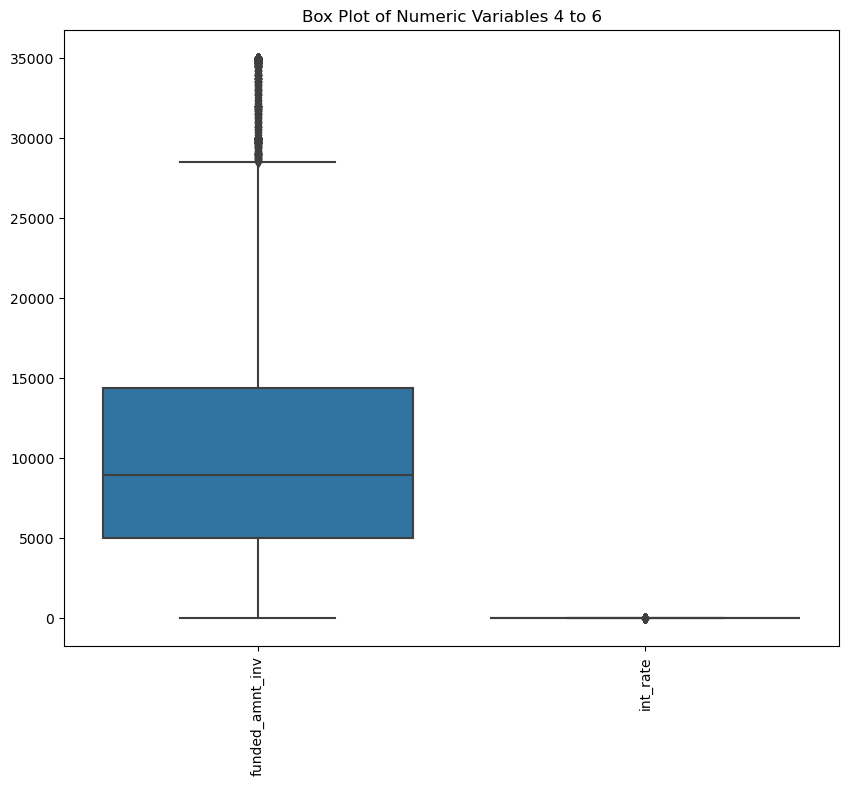

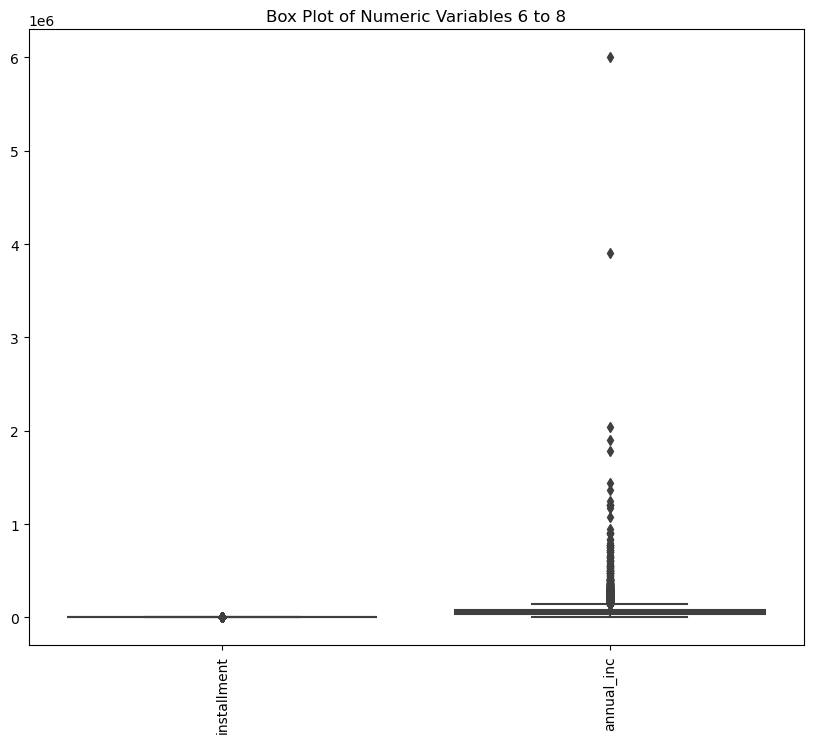

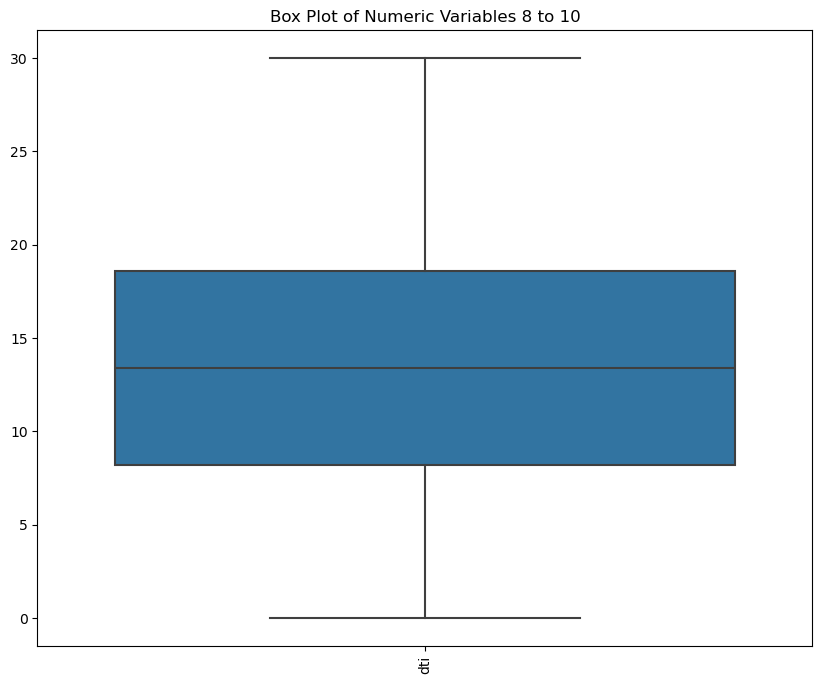

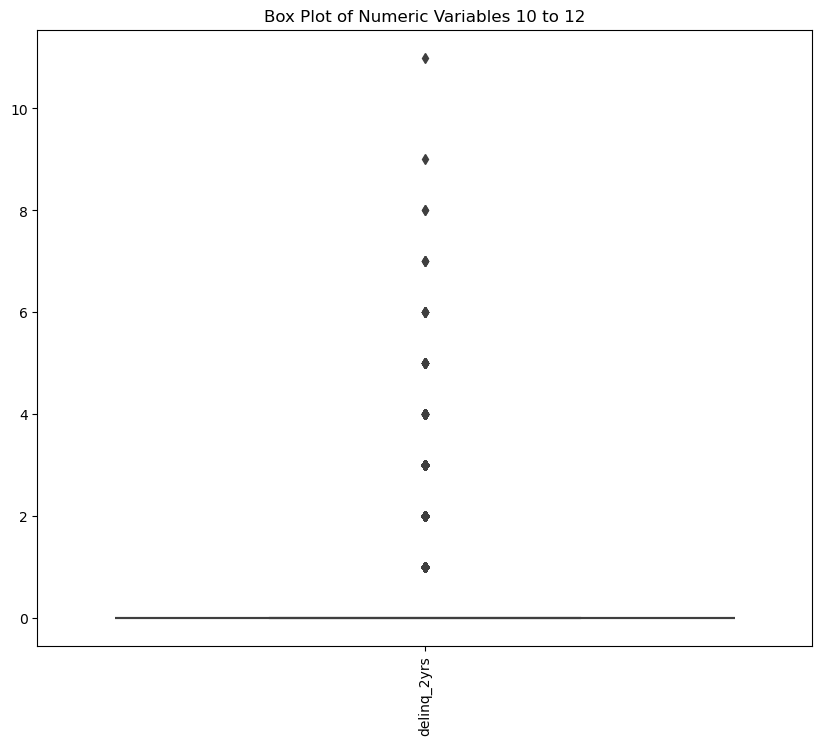

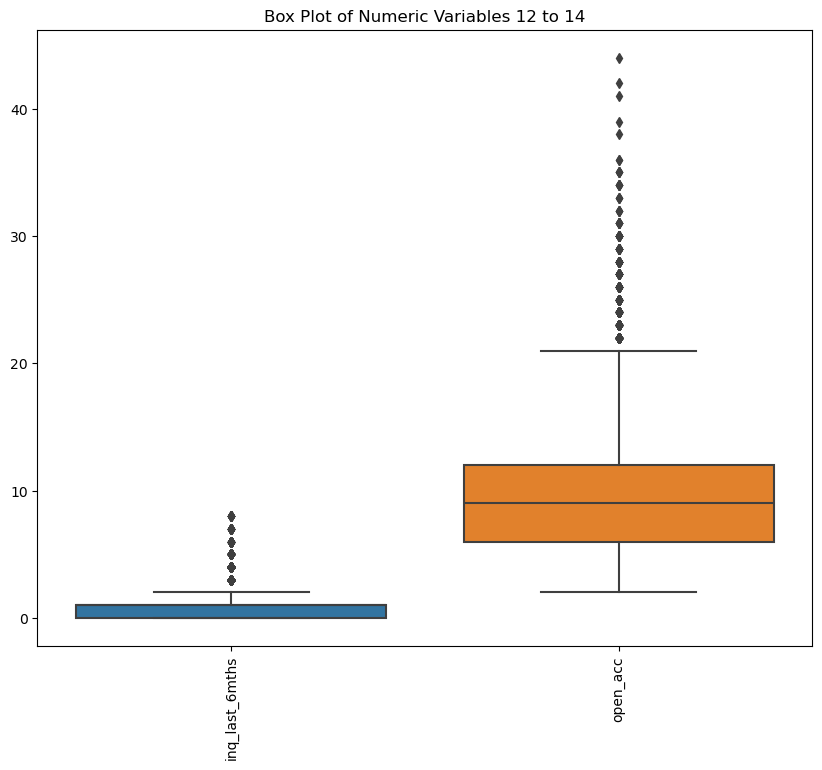

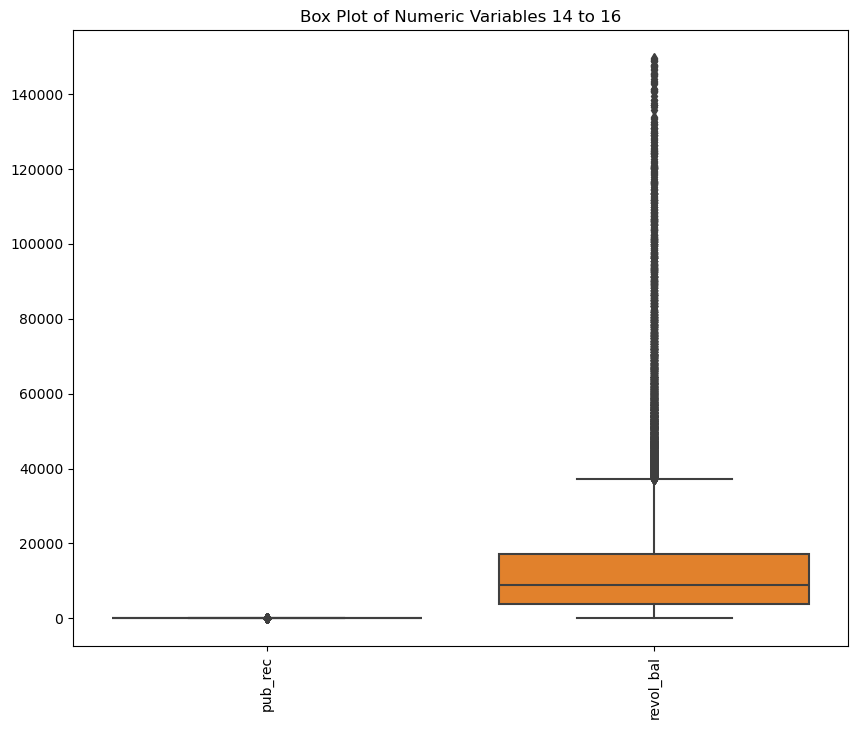

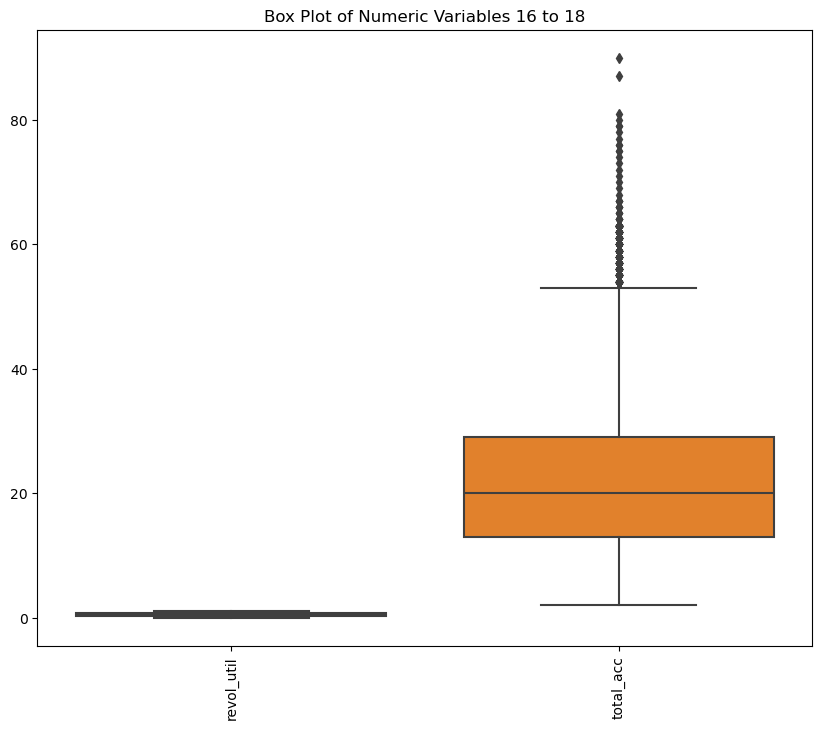

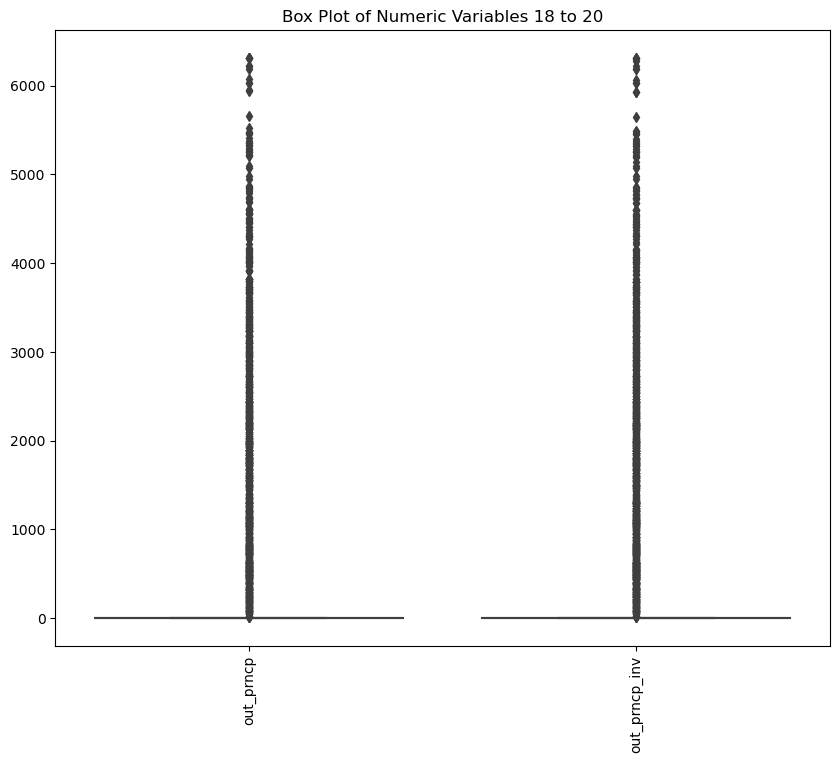

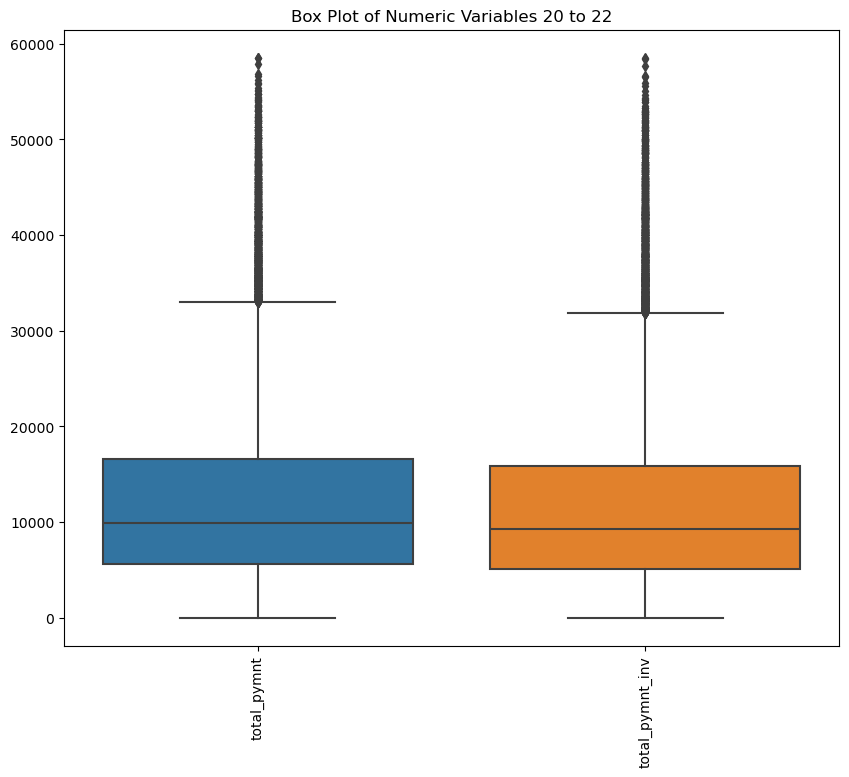

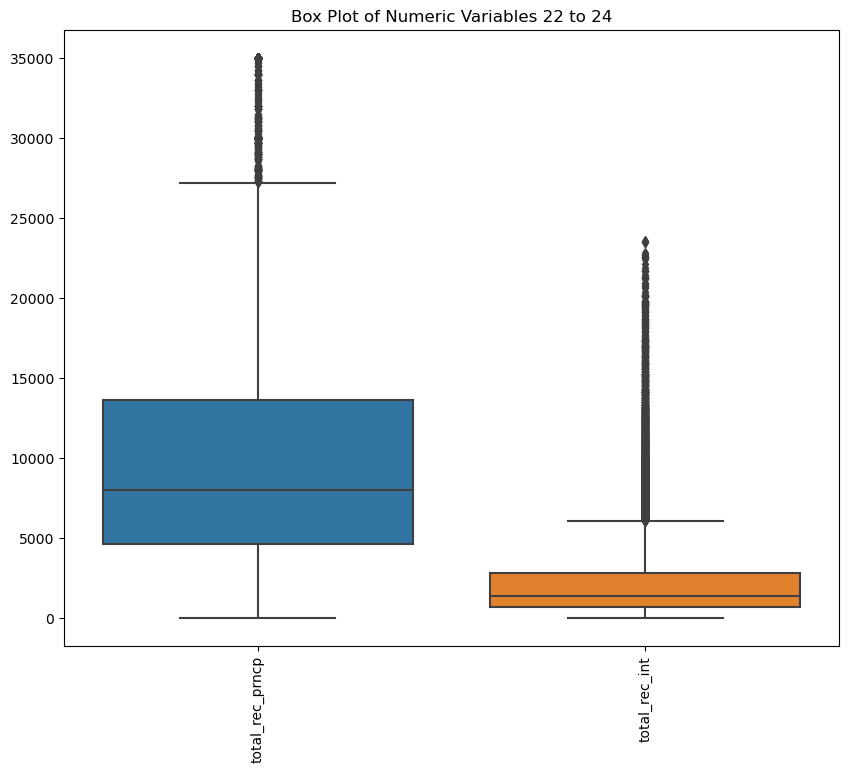

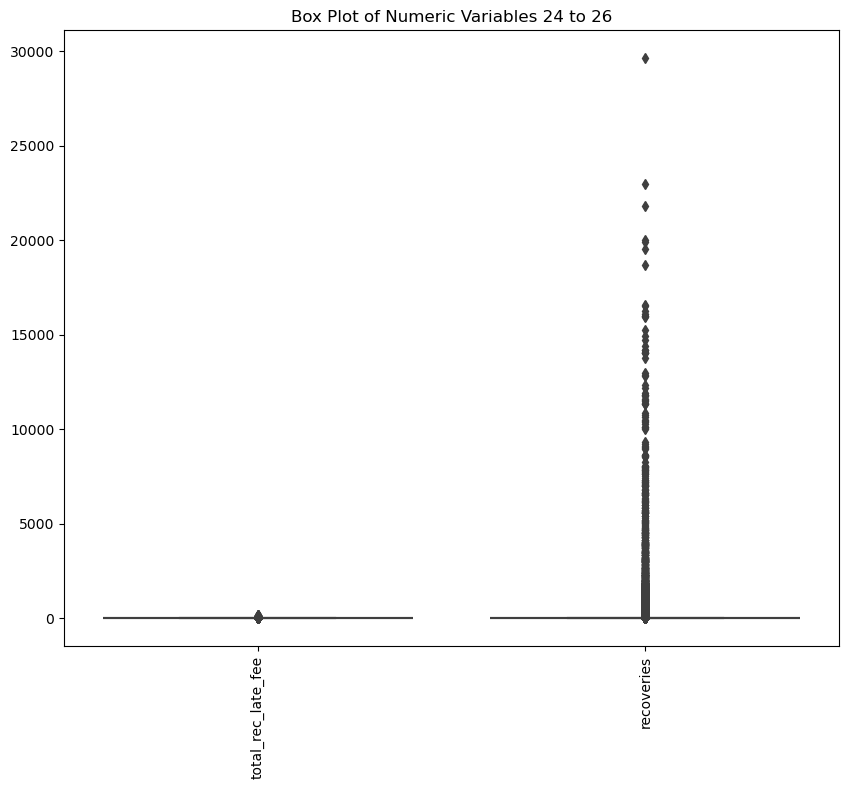

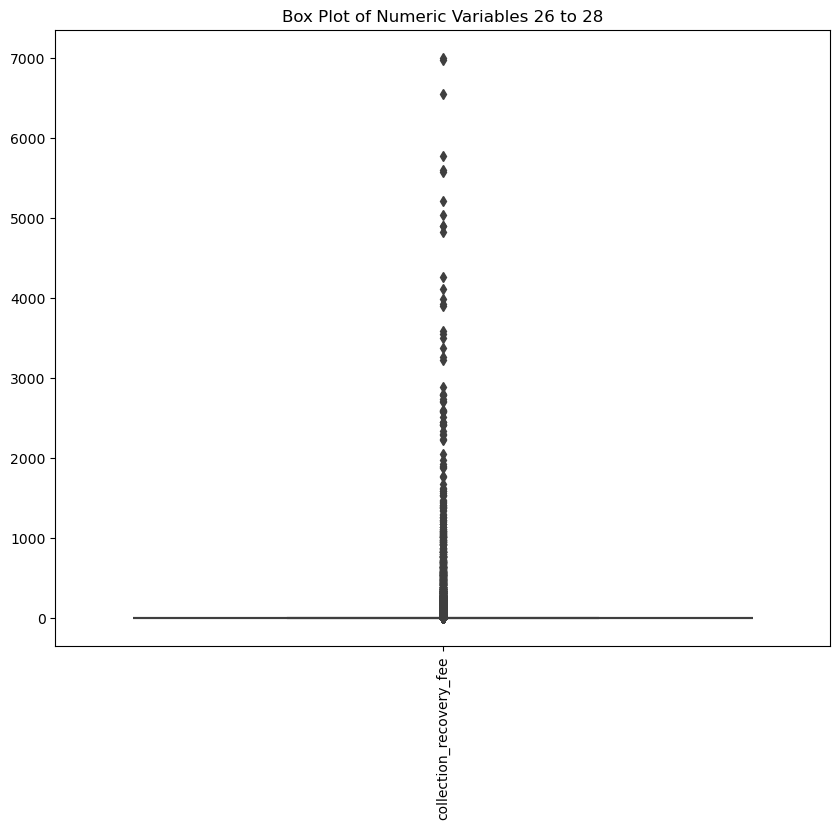

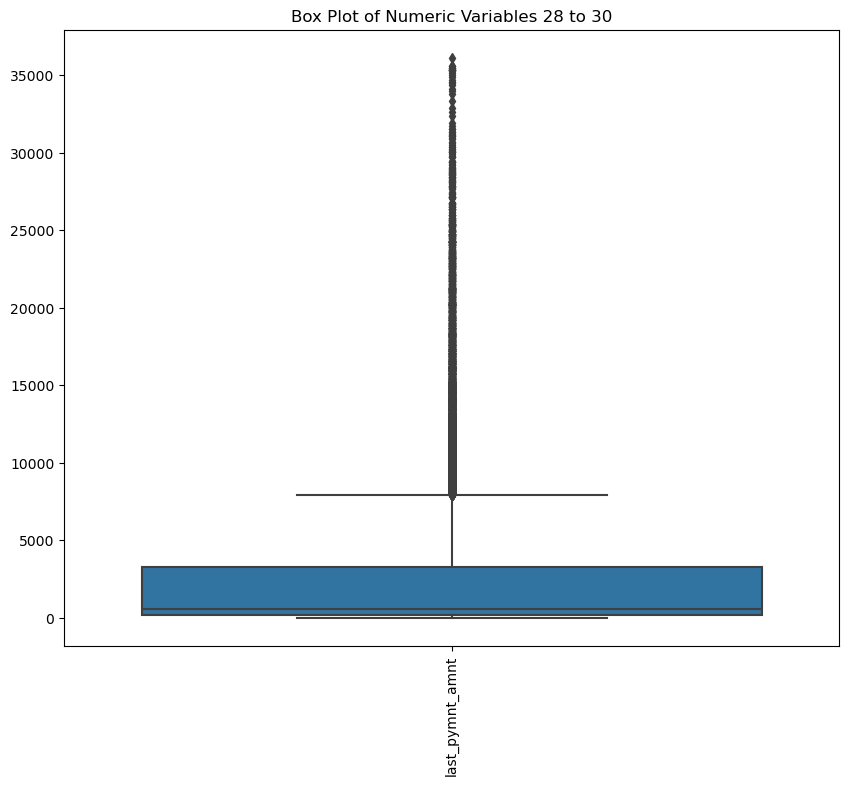

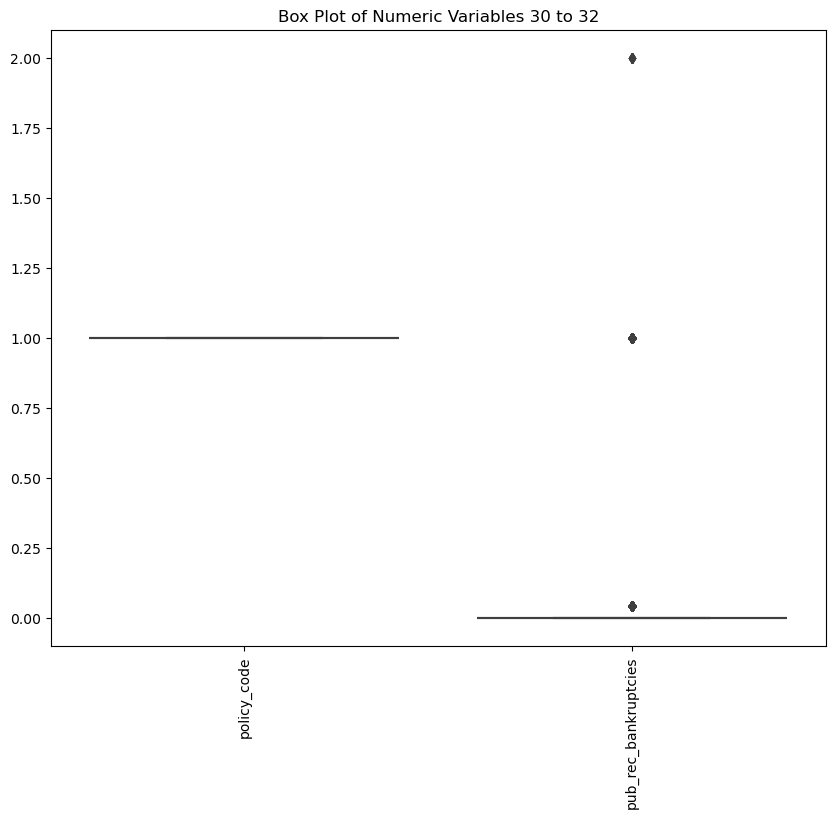

In [47]:
def plot_subset(df, cols, start, end):
    plt.figure(figsize=(10, 8))
    sns.boxplot(data=df[cols[start:end]])
    plt.title(f'Box Plot of Numeric Variables {start} to {end}')
    plt.xticks(rotation=90)
    plt.show()
subset_size =2 
for i in range(0, len(df_num_new.columns), subset_size):
    plot_subset(df_num_new, df_num_new.columns, i, i + subset_size)

In [48]:
# Calculation of Outlier and Quantile Q1, Q3, IQR,lower and upper whiskers

Q1 = df_num_new.quantile(0.25)
Q3 = df_num_new.quantile(0.75)
IQR = Q3 - Q1
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR
is_outlier = (df_num_new < LB) | (df_num_new > UB)
outlier_rows = df_num_new[is_outlier.any(axis=1)]

In [49]:
outlier_rows.shape

(20809, 32)

In [50]:
# Removing the outliers

non_outlier_rows = df_num_new[~is_outlier.any(axis=1)]

In [51]:
non_outlier_rows.shape

(18908, 32)

In [52]:
non_outlier_rows.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,issue_d,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,0.1065,162.87,24000.0,2024-12-11,27.65,0,1985-01-01,1,3,0,13648,0.837,9,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.0,0.0,2024-01-15,171.62,2024-05-16,1,0.0
2,1077175,1313524,2400,2400,2400.0,0.1596,84.33,12252.0,2024-12-11,8.72,0,2024-11-01,2,2,0,2956,0.985,10,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.0,0.0,2024-06-14,649.91,2024-05-16,1,0.0
6,1069639,1304742,7000,7000,7000.0,0.1596,170.08,47004.0,2024-12-11,23.51,0,2024-07-05,1,7,0,17726,0.856,11,0.0,0.0,10110.840000,10110.84,6985.61,3125.23,0.0,0.0,0.0,2024-05-16,1313.76,2024-05-16,1,0.0
7,1072053,1288686,3000,3000,3000.0,0.1864,109.43,48000.0,2024-12-11,5.35,0,2024-01-07,2,4,0,8221,0.875,4,0.0,0.0,3939.135294,3939.14,3000.00,939.14,0.0,0.0,0.0,2024-01-15,111.34,2024-12-14,1,0.0
10,1070078,1305201,6500,6500,6500.0,0.1465,153.45,72000.0,2024-12-11,16.12,0,1998-01-01,2,14,0,4032,0.206,23,0.0,0.0,7678.017673,7678.02,6500.00,1178.02,0.0,0.0,0.0,2024-06-13,1655.54,2024-12-15,1,0.0


In [53]:
# Copy the non-outlier data into clean dataframe

df_num_cleaned_cols=non_outlier_rows

In [54]:
df_num_cleaned_cols.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,issue_d,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,0.1065,162.87,24000.0,2024-12-11,27.65,0,1985-01-01,1,3,0,13648,0.837,9,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.0,0.0,2024-01-15,171.62,2024-05-16,1,0.0
2,1077175,1313524,2400,2400,2400.0,0.1596,84.33,12252.0,2024-12-11,8.72,0,2024-11-01,2,2,0,2956,0.985,10,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.0,0.0,2024-06-14,649.91,2024-05-16,1,0.0
6,1069639,1304742,7000,7000,7000.0,0.1596,170.08,47004.0,2024-12-11,23.51,0,2024-07-05,1,7,0,17726,0.856,11,0.0,0.0,10110.840000,10110.84,6985.61,3125.23,0.0,0.0,0.0,2024-05-16,1313.76,2024-05-16,1,0.0
7,1072053,1288686,3000,3000,3000.0,0.1864,109.43,48000.0,2024-12-11,5.35,0,2024-01-07,2,4,0,8221,0.875,4,0.0,0.0,3939.135294,3939.14,3000.00,939.14,0.0,0.0,0.0,2024-01-15,111.34,2024-12-14,1,0.0
10,1070078,1305201,6500,6500,6500.0,0.1465,153.45,72000.0,2024-12-11,16.12,0,1998-01-01,2,14,0,4032,0.206,23,0.0,0.0,7678.017673,7678.02,6500.00,1178.02,0.0,0.0,0.0,2024-06-13,1655.54,2024-12-15,1,0.0


In [55]:
df_num_cleaned_cols['delinq_2yrs'].unique()

array([0], dtype=int64)

In [56]:
df_num_cleaned_cols.shape

(18908, 32)

## Correlation matrix to understand the relationship between multiple numerical variables

In [57]:
corr=df_num_cleaned_cols.corr()
corr

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,issue_d,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,pub_rec_bankruptcies
id,1.000000,0.993381,0.005210,0.021758,0.092499,-0.073601,-0.002079,0.020490,0.393832,0.073793,NaN,0.064316,-0.022581,0.019720,NaN,0.014698,0.088099,0.024311,NaN,NaN,0.011809,0.079740,0.016030,-0.007695,NaN,NaN,NaN,0.153345,0.073294,0.060499,NaN,NaN
member_id,0.993381,1.000000,0.006210,0.021810,0.102689,-0.081296,-0.007197,0.022072,0.369868,0.074241,NaN,0.063537,-0.026941,0.017176,NaN,0.009347,0.085568,0.026996,NaN,NaN,0.012658,0.090276,0.016534,-0.005640,NaN,NaN,NaN,0.144570,0.076554,0.056814,NaN,NaN
loan_amnt,0.005210,0.006210,1.000000,0.977612,0.948422,0.088063,0.936075,0.325399,0.028203,0.063921,NaN,-0.168682,-0.028008,0.164705,NaN,0.347751,0.031776,0.205851,NaN,NaN,0.921316,0.894129,0.918278,0.737102,NaN,NaN,NaN,0.011924,0.195463,-0.008208,NaN,NaN
funded_amnt,0.021758,0.021810,0.977612,1.000000,0.973249,0.102139,0.967070,0.320249,0.010954,0.066275,NaN,-0.161316,-0.027218,0.161108,NaN,0.342847,0.038286,0.198934,NaN,NaN,0.941820,0.917049,0.940055,0.748113,NaN,NaN,NaN,0.007073,0.197812,-0.012486,NaN,NaN
funded_amnt_inv,0.092499,0.102689,0.948422,0.973249,1.000000,0.088878,0.935128,0.312720,0.026275,0.068489,NaN,-0.153297,-0.029313,0.154268,NaN,0.326296,0.038766,0.197266,NaN,NaN,0.922595,0.946202,0.920974,0.732409,NaN,NaN,NaN,0.013582,0.202582,-0.008149,NaN,NaN
int_rate,-0.073601,-0.081296,0.088063,0.102139,0.088878,1.000000,0.120183,-0.065555,0.002362,0.085673,NaN,0.223917,0.160134,-0.115683,NaN,0.084458,0.522473,-0.214051,NaN,NaN,0.146831,0.135103,0.060572,0.462681,NaN,NaN,NaN,-0.001175,0.045444,-0.012047,NaN,NaN
installment,-0.002079,-0.007197,0.936075,0.967070,0.935128,0.120183,1.000000,0.313060,0.008531,0.063232,NaN,-0.135682,-0.018756,0.149112,NaN,0.348417,0.079705,0.169239,NaN,NaN,0.915110,0.885222,0.925578,0.677866,NaN,NaN,NaN,0.014611,0.162419,-0.005401,NaN,NaN
annual_inc,0.020490,0.022072,0.325399,0.320249,0.312720,-0.065555,0.313060,1.000000,0.007253,-0.137127,NaN,-0.290921,0.012287,0.245239,NaN,0.324699,-0.007881,0.371697,NaN,NaN,0.309659,0.302358,0.322102,0.193554,NaN,NaN,NaN,0.001540,0.103052,-0.017260,NaN,NaN
issue_d,0.393832,0.369868,0.028203,0.010954,0.026275,0.002362,0.008531,0.007253,1.000000,0.004780,NaN,0.032477,0.008306,0.004759,NaN,0.027395,0.051303,-0.004723,NaN,NaN,0.008812,0.023389,0.009692,0.003394,NaN,NaN,NaN,0.324274,0.019567,0.182622,NaN,NaN
dti,0.073793,0.074241,0.063921,0.066275,0.068489,0.085673,0.063232,-0.137127,0.004780,1.000000,NaN,-0.032971,0.015220,0.285245,NaN,0.320544,0.270989,0.218697,NaN,NaN,0.065425,0.067566,0.050982,0.109602,NaN,NaN,NaN,0.022347,-0.003440,-0.006500,NaN,NaN


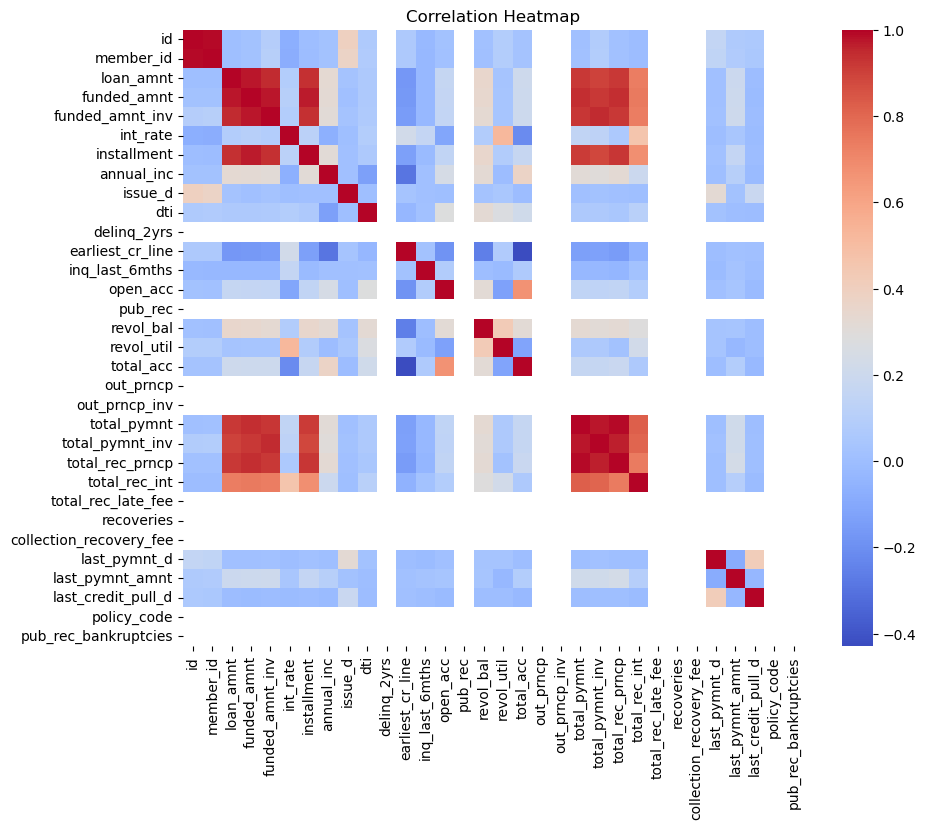

In [58]:
# Based on correlation matrix, INTREST RATE is inversely proportional loan amount, dti
#Installment amount is highly corelated to loan amount and total payment made,total_rec_prncp


plt.figure(figsize=(10, 8))
sns.heatmap(corr,cmap='coolwarm',annot=False, fmt='.2f', annot_kws={'size': 10})
plt.title('Correlation Heatmap')
plt.show()

In [59]:
# Filtering the highly corelated data (.75 and above)

df_corr_greater_75=corr[corr>0.75]
df_corr_greater_75

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,issue_d,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,pub_rec_bankruptcies
id,1.000000,0.993381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
member_id,0.993381,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,NaN,NaN,1.000000,0.977612,0.948422,NaN,0.936075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.921316,0.894129,0.918278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
funded_amnt,NaN,NaN,0.977612,1.000000,0.973249,NaN,0.967070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.941820,0.917049,0.940055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
funded_amnt_inv,NaN,NaN,0.948422,0.973249,1.000000,NaN,0.935128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.922595,0.946202,0.920974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
int_rate,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
installment,NaN,NaN,0.936075,0.967070,0.935128,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.915110,0.885222,0.925578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
annual_inc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
issue_d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Correlated Pairs

In [60]:
threshold = 0.75 

correlated_pairs = []

# Loop through the correlation matrix
for i in range(len(corr.columns)):
    for j in range(i + 1, len(corr.columns)):  # Only check upper triangle
        if abs(corr.iloc[i, j]) >= threshold:
            correlated_pairs.append((corr.index[i], corr.columns[j]))

# Print highly correlated variable pairs
for pair in correlated_pairs:
    print(pair)

('id', 'member_id')
('loan_amnt', 'funded_amnt')
('loan_amnt', 'funded_amnt_inv')
('loan_amnt', 'installment')
('loan_amnt', 'total_pymnt')
('loan_amnt', 'total_pymnt_inv')
('loan_amnt', 'total_rec_prncp')
('funded_amnt', 'funded_amnt_inv')
('funded_amnt', 'installment')
('funded_amnt', 'total_pymnt')
('funded_amnt', 'total_pymnt_inv')
('funded_amnt', 'total_rec_prncp')
('funded_amnt_inv', 'installment')
('funded_amnt_inv', 'total_pymnt')
('funded_amnt_inv', 'total_pymnt_inv')
('funded_amnt_inv', 'total_rec_prncp')
('installment', 'total_pymnt')
('installment', 'total_pymnt_inv')
('installment', 'total_rec_prncp')
('total_pymnt', 'total_pymnt_inv')
('total_pymnt', 'total_rec_prncp')
('total_pymnt', 'total_rec_int')
('total_pymnt_inv', 'total_rec_prncp')
('total_pymnt_inv', 'total_rec_int')


In [61]:
# Filtering the less corelated data (.25 and above)

df_corr_less_25=corr[corr<0.25]
df_corr_less_25

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,issue_d,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,pub_rec_bankruptcies
id,NaN,NaN,0.005210,0.021758,0.092499,-0.073601,-0.002079,0.020490,NaN,0.073793,NaN,0.064316,-0.022581,0.019720,NaN,0.014698,0.088099,0.024311,NaN,NaN,0.011809,0.079740,0.016030,-0.007695,NaN,NaN,NaN,0.153345,0.073294,0.060499,NaN,NaN
member_id,NaN,NaN,0.006210,0.021810,0.102689,-0.081296,-0.007197,0.022072,NaN,0.074241,NaN,0.063537,-0.026941,0.017176,NaN,0.009347,0.085568,0.026996,NaN,NaN,0.012658,0.090276,0.016534,-0.005640,NaN,NaN,NaN,0.144570,0.076554,0.056814,NaN,NaN
loan_amnt,0.005210,0.006210,NaN,NaN,NaN,0.088063,NaN,NaN,0.028203,0.063921,NaN,-0.168682,-0.028008,0.164705,NaN,NaN,0.031776,0.205851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011924,0.195463,-0.008208,NaN,NaN
funded_amnt,0.021758,0.021810,NaN,NaN,NaN,0.102139,NaN,NaN,0.010954,0.066275,NaN,-0.161316,-0.027218,0.161108,NaN,NaN,0.038286,0.198934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007073,0.197812,-0.012486,NaN,NaN
funded_amnt_inv,0.092499,0.102689,NaN,NaN,NaN,0.088878,NaN,NaN,0.026275,0.068489,NaN,-0.153297,-0.029313,0.154268,NaN,NaN,0.038766,0.197266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.013582,0.202582,-0.008149,NaN,NaN
int_rate,-0.073601,-0.081296,0.088063,0.102139,0.088878,NaN,0.120183,-0.065555,0.002362,0.085673,NaN,0.223917,0.160134,-0.115683,NaN,0.084458,NaN,-0.214051,NaN,NaN,0.146831,0.135103,0.060572,NaN,NaN,NaN,NaN,-0.001175,0.045444,-0.012047,NaN,NaN
installment,-0.002079,-0.007197,NaN,NaN,NaN,0.120183,NaN,NaN,0.008531,0.063232,NaN,-0.135682,-0.018756,0.149112,NaN,NaN,0.079705,0.169239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.014611,0.162419,-0.005401,NaN,NaN
annual_inc,0.020490,0.022072,NaN,NaN,NaN,-0.065555,NaN,NaN,0.007253,-0.137127,NaN,-0.290921,0.012287,0.245239,NaN,NaN,-0.007881,NaN,NaN,NaN,NaN,NaN,NaN,0.193554,NaN,NaN,NaN,0.001540,0.103052,-0.017260,NaN,NaN
issue_d,NaN,NaN,0.028203,0.010954,0.026275,0.002362,0.008531,0.007253,NaN,0.004780,NaN,0.032477,0.008306,0.004759,NaN,0.027395,0.051303,-0.004723,NaN,NaN,0.008812,0.023389,0.009692,0.003394,NaN,NaN,NaN,NaN,0.019567,0.182622,NaN,NaN
dti,0.073793,0.074241,0.063921,0.066275,0.068489,0.085673,0.063232,-0.137127,0.004780,NaN,NaN,-0.032971,0.015220,NaN,NaN,NaN,NaN,0.218697,NaN,NaN,0.065425,0.067566,0.050982,0.109602,NaN,NaN,NaN,0.022347,-0.003440,-0.006500,NaN,NaN


## Below Columns are highly Correlated
### ['member_id', 'funded_amnt', 'funded_amnt_inv', 'installment', 'issue_d', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int']

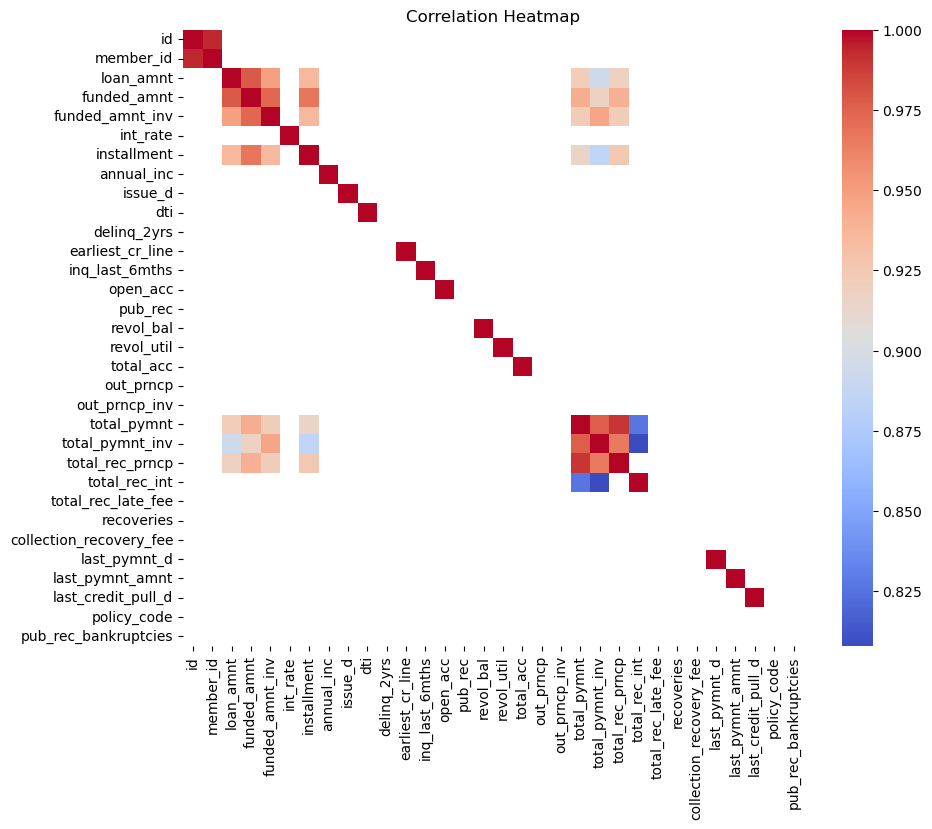

In [62]:
# Generating Heat map

plt.figure(figsize=(10, 8))
sns.heatmap(df_corr_greater_75,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Drop if needed ,the correlated columns

In [63]:
# upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
# to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]
# df_num_new_reduced = df_num_cleaned_cols.drop(columns=to_drop)

In [64]:
# print("Dropped columns:", to_drop)

In [65]:
# plt.figure(figsize=(10, 8))
# sns.heatmap(df_num_new_reduced.corr(), cmap='coolwarm', annot=False)
# plt.title('Correlation Heatmap of Reduced DataFrame')
# plt.show()

In [66]:
# df_num_new_reduced.shape

In [67]:
# df_num_new_reduced.head()

In [68]:
df_cat_new=df.select_dtypes('object')

In [69]:
df_cat_new.isnull().sum()

term                       0
grade                      0
sub_grade                  0
emp_title               2459
emp_length              1075
home_ownership             0
verification_status        0
loan_status                0
pymnt_plan                 0
url                        0
desc                   12942
purpose                    0
title                     11
zip_code                   0
addr_state                 0
initial_list_status        0
application_type           0
dtype: int64

In [70]:
# Filling the null values with mode (highest frequency) value

df_cat_new=df_cat_new.fillna(df_cat_new.mode().iloc[0])#,inplace=True)

In [71]:
df_cat_new.isnull().sum()

term                   0
grade                  0
sub_grade              0
emp_title              0
emp_length             0
home_ownership         0
verification_status    0
loan_status            0
pymnt_plan             0
url                    0
desc                   0
purpose                0
title                  0
zip_code               0
addr_state             0
initial_list_status    0
application_type       0
dtype: int64

In [72]:
df_cat_new.shape

(39717, 17)

In [73]:
df_cat_new.head()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,initial_list_status,application_type
0,36 months,B,B2,US Army,10+ years,RENT,Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,f,INDIVIDUAL
1,60 months,C,C4,Ryder,< 1 year,RENT,Source Verified,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,f,INDIVIDUAL
2,36 months,C,C5,US Army,10+ years,RENT,Not Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,,small_business,real estate business,606xx,IL,f,INDIVIDUAL
3,36 months,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,f,INDIVIDUAL
4,60 months,B,B5,University Medical Group,1 year,RENT,Source Verified,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,f,INDIVIDUAL


In [74]:
# df_num_new_reduced.shape

In [75]:
# df_num_new_reduced.head()

In [76]:
# df_cat_new.head(10)

In [77]:
# # common_indices = df_num_new_reduced.index.intersection(df_cat_new.index)
# # common_indices
# df_num_new_reduced.shape
# df_cat_filtered = df_cat_new.loc[common_indices]
# df_merge = pd.concat([df_num_new_reduced, df_cat_filtered], axis=1)

## To align the indexes of the Categorical column as per the numerical column

In [78]:
common_indices = df_num_cleaned_cols.index.intersection(df_cat_new.index)
common_indices

Index([    0,     2,     6,     7,    10,    11,    13,    15,    16,    17,
       ...
       38985, 38986, 38987, 38988, 38992, 38995, 38996, 38997, 38999, 39002],
      dtype='int64', length=18908)

In [79]:
df_num_cleaned_cols.shape

(18908, 32)

In [80]:
df_cat_filtered = df_cat_new.loc[common_indices]


## Concatenationg the numerical and categorical columns to form the final dataframe df_merge 

In [81]:
df_merge = pd.concat([df_num_cleaned_cols, df_cat_filtered], axis=1)

In [82]:
df_cat_filtered.shape

(18908, 17)

In [83]:
df_num_cleaned_cols.shape

(18908, 32)

In [84]:
df_merge.shape

(18908, 49)

In [85]:
df_merge.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,issue_d,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,pub_rec_bankruptcies,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,initial_list_status,application_type
0,1077501,1296599,5000,5000,4975.0,0.1065,162.87,24000.0,2024-12-11,27.65,0,1985-01-01,1,3,0,13648,0.837,9,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.0,0.0,2024-01-15,171.62,2024-05-16,1,0.0,36 months,B,B2,US Army,10+ years,RENT,Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,f,INDIVIDUAL
2,1077175,1313524,2400,2400,2400.0,0.1596,84.33,12252.0,2024-12-11,8.72,0,2024-11-01,2,2,0,2956,0.985,10,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.0,0.0,2024-06-14,649.91,2024-05-16,1,0.0,36 months,C,C5,US Army,10+ years,RENT,Not Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,,small_business,real estate business,606xx,IL,f,INDIVIDUAL
6,1069639,1304742,7000,7000,7000.0,0.1596,170.08,47004.0,2024-12-11,23.51,0,2024-07-05,1,7,0,17726,0.856,11,0.0,0.0,10110.840000,10110.84,6985.61,3125.23,0.0,0.0,0.0,2024-05-16,1313.76,2024-05-16,1,0.0,60 months,C,C5,Southern Star Photography,8 years,RENT,Not Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/18/11 > I am planning o...,debt_consolidation,Loan,280xx,NC,f,INDIVIDUAL
7,1072053,1288686,3000,3000,3000.0,0.1864,109.43,48000.0,2024-12-11,5.35,0,2024-01-07,2,4,0,8221,0.875,4,0.0,0.0,3939.135294,3939.14,3000.00,939.14,0.0,0.0,0.0,2024-01-15,111.34,2024-12-14,1,0.0,36 months,E,E1,MKC Accounting,9 years,RENT,Source Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/16/11 > Downpayment for...,car,Car Downpayment,900xx,CA,f,INDIVIDUAL
10,1070078,1305201,6500,6500,6500.0,0.1465,153.45,72000.0,2024-12-11,16.12,0,1998-01-01,2,14,0,4032,0.206,23,0.0,0.0,7678.017673,7678.02,6500.00,1178.02,0.0,0.0,0.0,2024-06-13,1655.54,2024-12-15,1,0.0,60 months,C,C3,Southwest Rural metro,5 years,OWN,Not Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/15/11 > I had recived a...,debt_consolidation,High intrest Consolidation,853xx,AZ,f,INDIVIDUAL


## Univariate Analysis

Univariate analysis involves statistically examining a single variable to summarize its key characteristics and comprehend its distribution. Its objective is to describe and analyze the variable in isolation, without taking into account its correlation with other variables.

In [86]:
# Calculate the percentage of defaulters between Fully paid and Defaulters, not considering active loans

loans_count = df_merge.loan_status.value_counts()
total_loans = loans_count.sum()
percentage_defaulted = loans_count['Charged Off'] / total_loans * 100
percentage_defaulted

3.4958747620055006

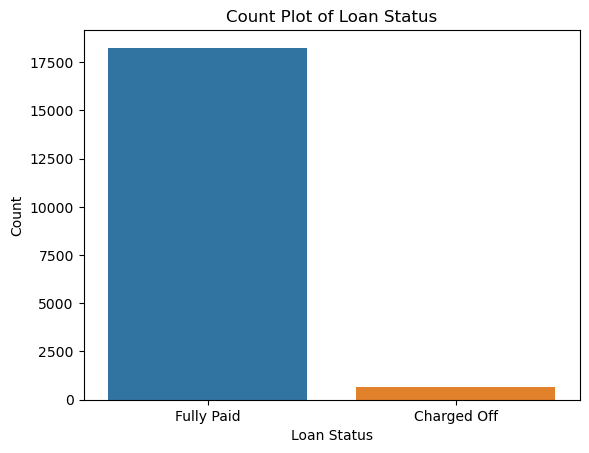

In [87]:
#Class Imbalance can be seen in the target variable. Based on loan status

sns.countplot(data=df_merge, x='loan_status')
plt.title('Count Plot of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

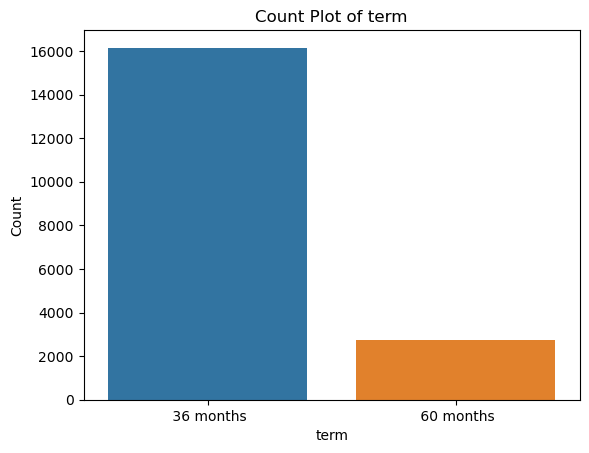

In [88]:
#Class Imbalance can be seen in the target variable. Based on term length

sns.countplot(data=df_merge, x='term')
plt.title('Count Plot of term')
plt.xlabel('term')
plt.ylabel('Count')
plt.show()

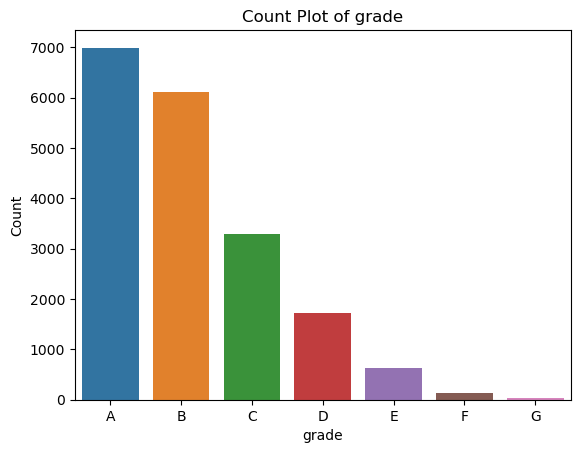

In [89]:
## The letter grades that are assigned to loans indicate the expected risk of the loan. Loans graded A have the lowest expected risk of loss and therefore pay the lender the lowest interest rate. On the other hand, G loans have the highest expected risk of loss.
desc_order=df_merge['grade'].value_counts().sort_values(ascending=False)
sns.countplot(data=df_merge, x='grade',order=desc_order.index)
plt.title('Count Plot of grade')
plt.xlabel('grade')
plt.ylabel('Count')
plt.show()

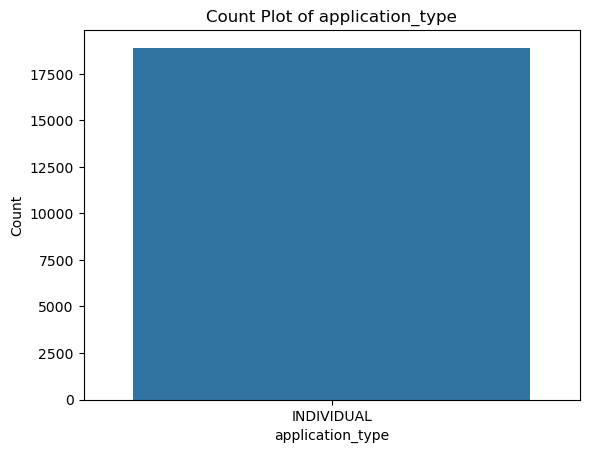

In [90]:
sns.countplot(data=df_merge, x='application_type')
plt.title('Count Plot of application_type')
plt.xlabel('application_type')
plt.ylabel('Count')
plt.show()

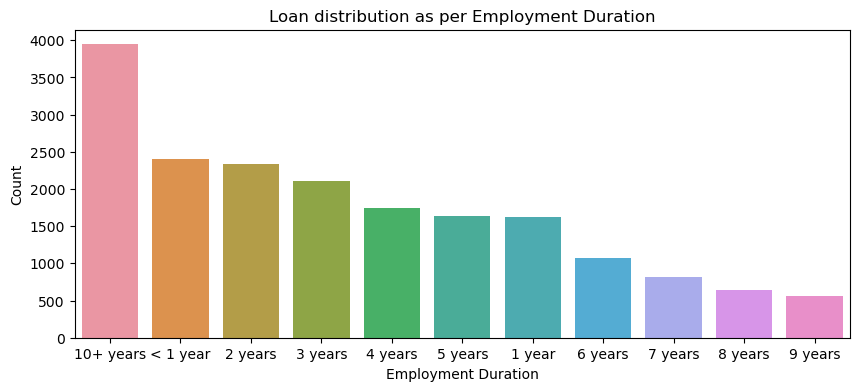

In [91]:
# Loan distribution as per Employment Duration

desc_order=df_merge['emp_length'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10, 4))
sns.countplot(data=df_merge, x='emp_length',order=desc_order.index)
plt.title('Loan distribution as per Employment Duration')
plt.xlabel('Employment Duration')
plt.ylabel('Count')
plt.show()

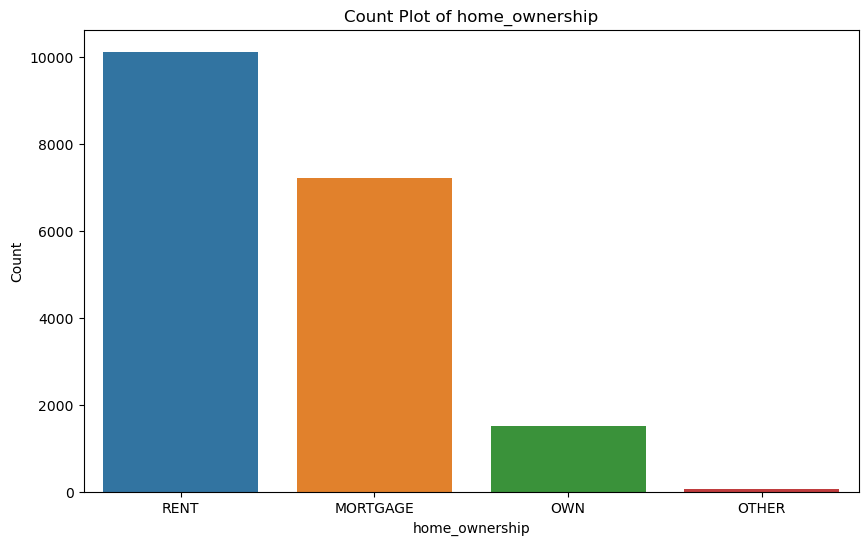

In [92]:
# Loan distribution as per Home Ownership

desc_order=df_merge['home_ownership'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.countplot(data=df_merge, x='home_ownership',order=desc_order.index)
plt.title('Count Plot of home_ownership')
plt.xlabel('home_ownership')
plt.ylabel('Count')
plt.show()

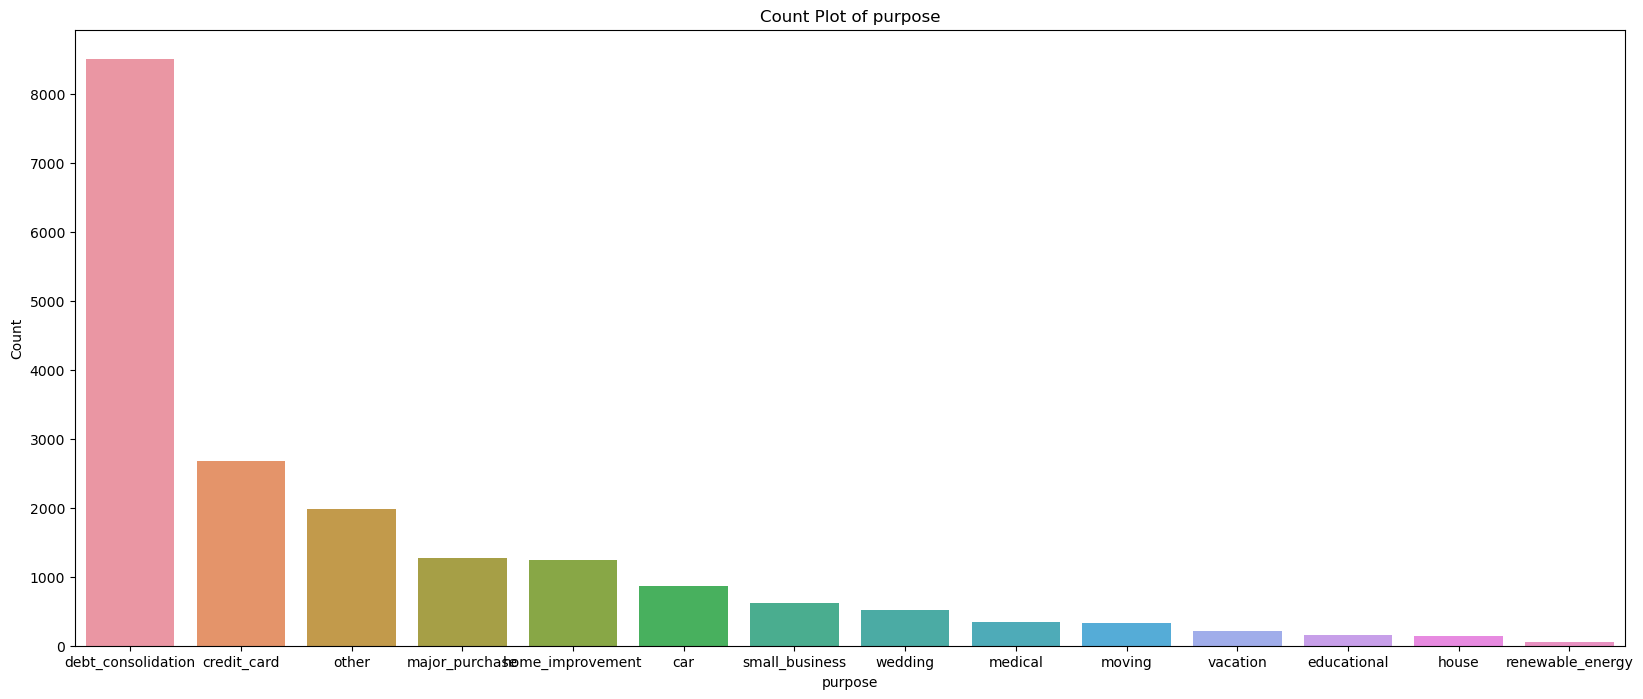

In [93]:
# Loan distribution as per Purpose

desc_order=df_merge['purpose'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(20, 8))
sns.countplot(data=df_merge, x='purpose',order=desc_order.index)
plt.title('Count Plot of purpose')
plt.xlabel('purpose')
plt.ylabel('Count')
plt.show()

##  Bivariate Analysis 

Bivariate analysis refers to the statistical analysis that involves examining the relationship between two variables. Unlike univariate analysis, which focuses on analyzing a single variable independently, bivariate analysis explores how the value of one variable changes with the value of another variable. The main goal of bivariate analysis is to determine whether there is a relationship or association between the two variables and to understand the nature and strength of that relationship.

In [94]:
df_merge.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,issue_d,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,pub_rec_bankruptcies,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,initial_list_status,application_type
0,1077501,1296599,5000,5000,4975.0,0.1065,162.87,24000.0,2024-12-11,27.65,0,1985-01-01,1,3,0,13648,0.837,9,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.0,0.0,2024-01-15,171.62,2024-05-16,1,0.0,36 months,B,B2,US Army,10+ years,RENT,Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,f,INDIVIDUAL
2,1077175,1313524,2400,2400,2400.0,0.1596,84.33,12252.0,2024-12-11,8.72,0,2024-11-01,2,2,0,2956,0.985,10,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.0,0.0,2024-06-14,649.91,2024-05-16,1,0.0,36 months,C,C5,US Army,10+ years,RENT,Not Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,,small_business,real estate business,606xx,IL,f,INDIVIDUAL
6,1069639,1304742,7000,7000,7000.0,0.1596,170.08,47004.0,2024-12-11,23.51,0,2024-07-05,1,7,0,17726,0.856,11,0.0,0.0,10110.840000,10110.84,6985.61,3125.23,0.0,0.0,0.0,2024-05-16,1313.76,2024-05-16,1,0.0,60 months,C,C5,Southern Star Photography,8 years,RENT,Not Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/18/11 > I am planning o...,debt_consolidation,Loan,280xx,NC,f,INDIVIDUAL
7,1072053,1288686,3000,3000,3000.0,0.1864,109.43,48000.0,2024-12-11,5.35,0,2024-01-07,2,4,0,8221,0.875,4,0.0,0.0,3939.135294,3939.14,3000.00,939.14,0.0,0.0,0.0,2024-01-15,111.34,2024-12-14,1,0.0,36 months,E,E1,MKC Accounting,9 years,RENT,Source Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/16/11 > Downpayment for...,car,Car Downpayment,900xx,CA,f,INDIVIDUAL
10,1070078,1305201,6500,6500,6500.0,0.1465,153.45,72000.0,2024-12-11,16.12,0,1998-01-01,2,14,0,4032,0.206,23,0.0,0.0,7678.017673,7678.02,6500.00,1178.02,0.0,0.0,0.0,2024-06-13,1655.54,2024-12-15,1,0.0,60 months,C,C3,Southwest Rural metro,5 years,OWN,Not Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/15/11 > I had recived a...,debt_consolidation,High intrest Consolidation,853xx,AZ,f,INDIVIDUAL


In [95]:
## label Encoding of the Categorical Columns

In [96]:
#categorical_columns = df_merge.select_dtypes(include=['object']).columns  
# le = LabelEncoder()
# for column in categorical_columns:
#     df_merge[column] = le.fit_transform(df_merge[column])

Text(0, 0.5, 'Annual Income')

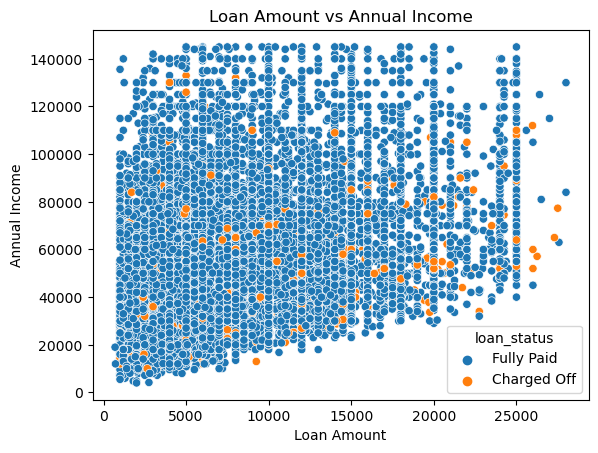

In [97]:
# To understand the relationship between loan amount and annual Income
#Higher the income lower the Loan amount and the people who has less salary and and takes more loan amount tends to be defaulters

sns.scatterplot(data=df_merge,x='loan_amnt',y='annual_inc',hue='loan_status')
plt.title('Loan Amount vs Annual Income')
plt.xlabel('Loan Amount')
plt.ylabel('Annual Income')


In [98]:
# cross_tab = pd.crosstab(df['home_ownership'], df['loan_status'])
# print(cross_tab)

# from scipy.stats import chi2_contingency

# chi2, p, dof, ex = chi2_contingency(cross_tab)
# print(f"Chi-Square Test Statistic: {chi2}")
# print(f"P-Value: {p}")

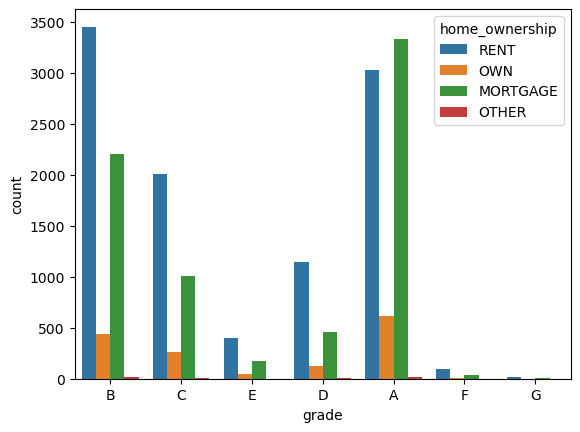

In [99]:
#Grade A and B people generally who applies for loan generally has Rented or Mortgage houses
sns.countplot(x='grade', hue='home_ownership', data=df_merge)
plt.show()

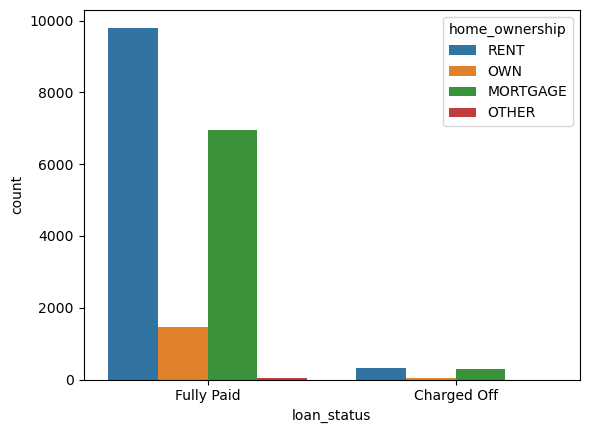

In [100]:
#The people who livw in Rented or Mortgage Houses the pay the loan fully
sns.countplot(x='loan_status', hue='home_ownership', data=df_merge)
plt.show()

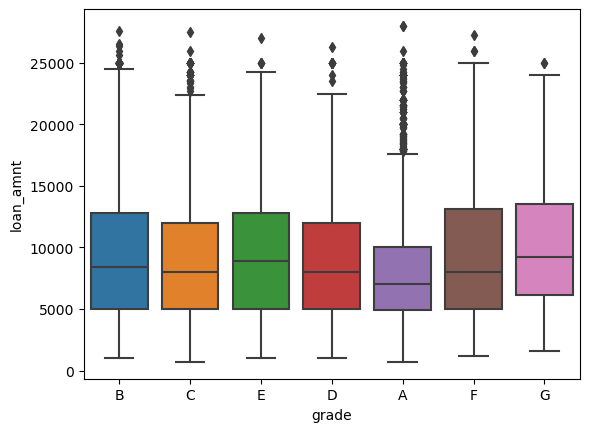

In [101]:
#B, E, F Grade takes more loan amount 
sns.boxplot(x='grade', y='loan_amnt', data=df_merge)
plt.show()

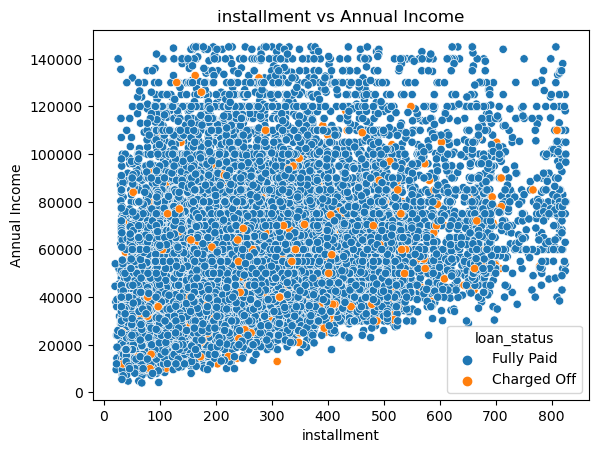

In [102]:
# Scatter plot w.r.t installlment amount

sns.scatterplot(data=df_merge,x='installment',y='annual_inc',hue='loan_status')
plt.title('installment vs Annual Income')
plt.xlabel('installment')
plt.ylabel('Annual Income')
plt.show()

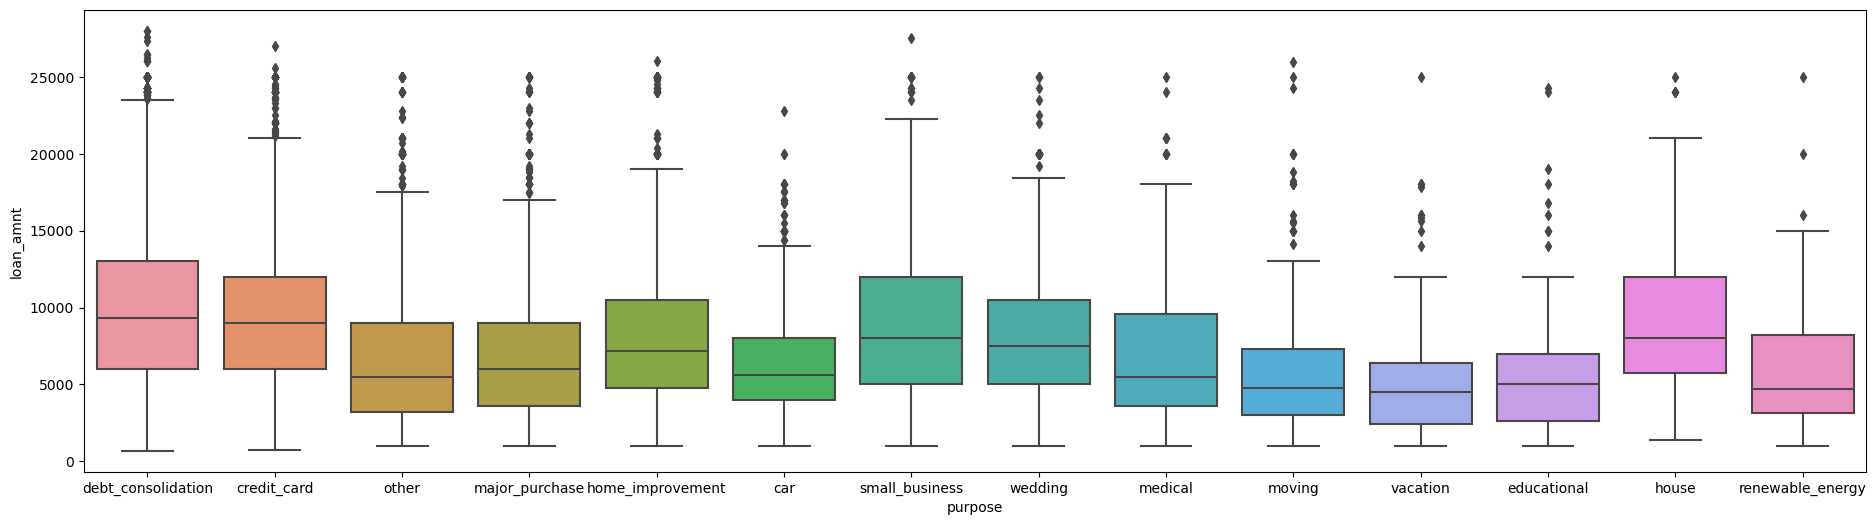

In [103]:
# Distribution of Loan amount based on Purpose

desc_order=df_merge['purpose'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(23, 6))
sns.boxplot(x='purpose', y='loan_amnt', data=df_merge,order=desc_order.index)
plt.show()

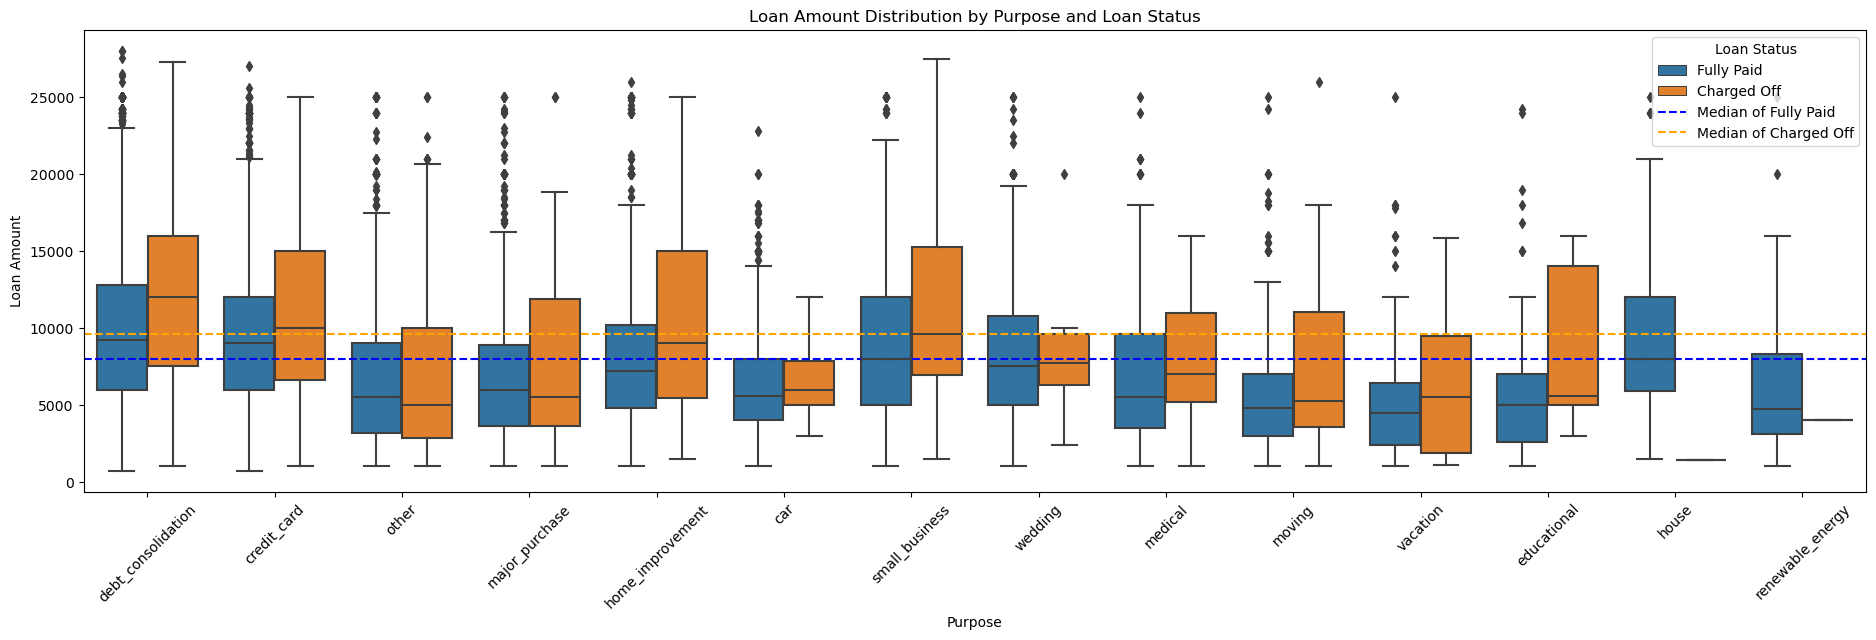

In [104]:

# Sort purposes by their counts in descending order
desc_order = df_merge['purpose'].value_counts().sort_values(ascending=False)

# Plotting boxplot with loan_status as hue
plt.figure(figsize=(23, 6))
ax = sns.boxplot(x='purpose', y='loan_amnt', hue='loan_status', data=df_merge, order=desc_order.index)

# Add a horizontal line for median of fully paid loans
median_fully_paid = df_merge[df_merge['loan_status'] == 'Fully Paid']['loan_amnt'].median()
ax.axhline(median_fully_paid, color='blue', linestyle='--', label='Median of Fully Paid')

# Add a horizontal line for median of charged off loans
median_charged_off = df_merge[df_merge['loan_status'] == 'Charged Off']['loan_amnt'].median()
ax.axhline(median_charged_off, color='orange', linestyle='--', label='Median of Charged Off')

plt.title('Loan Amount Distribution by Purpose and Loan Status')
plt.xlabel('Purpose')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')
plt.show()


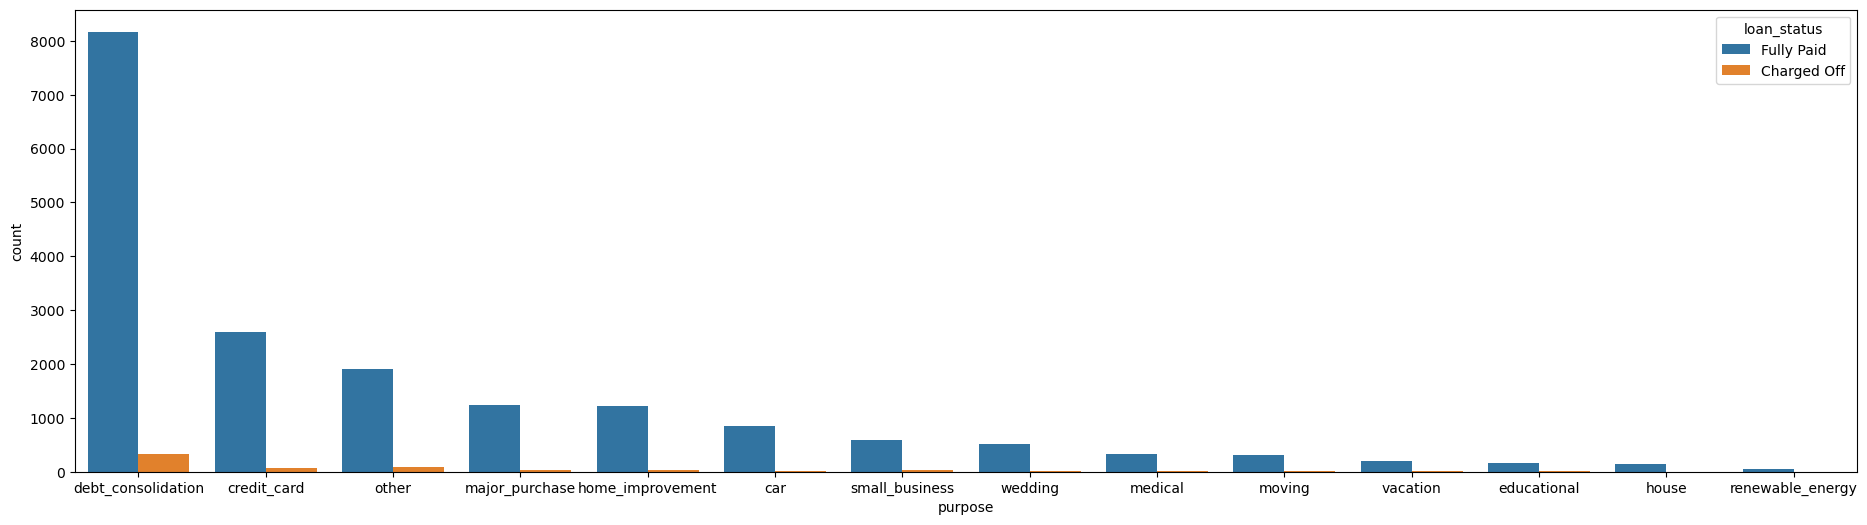

In [105]:
# Loan status based on purpose


desc_order=df_merge['purpose'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(23, 6))
sns.countplot(x='purpose', hue='loan_status', data=df_merge,order=desc_order.index)
plt.show()

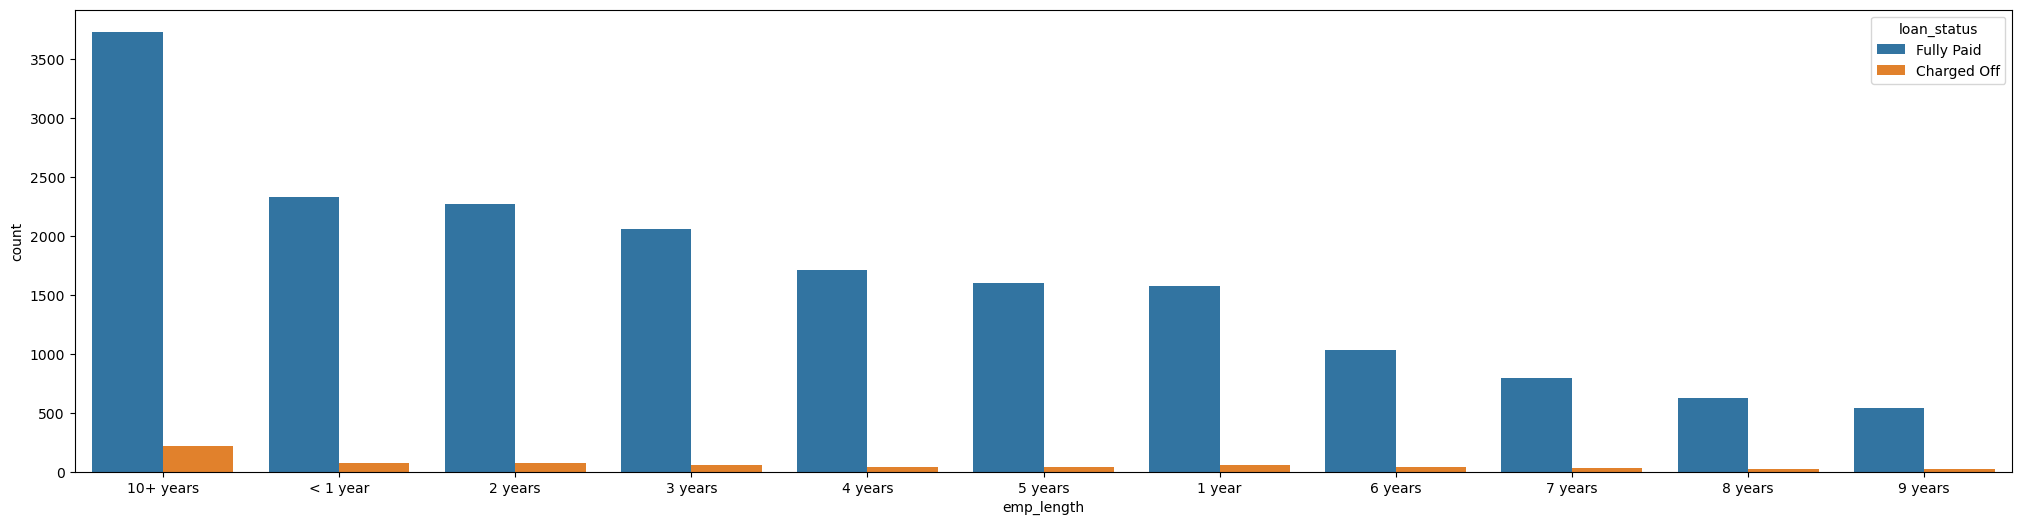

In [106]:
# Loan staus w.r.t. employee work exp

desc_order=df_merge['emp_length'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(25, 6))
sns.countplot(x='emp_length', hue='loan_status', data=df_merge,order=desc_order.index)
plt.show()

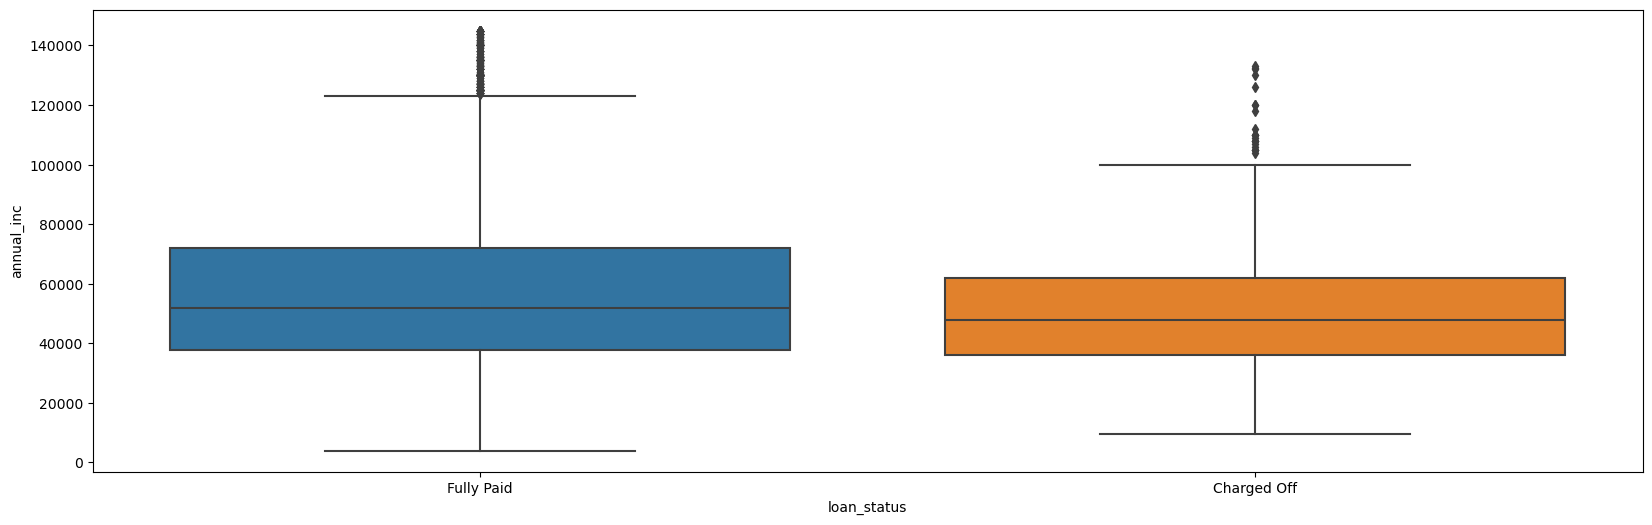

In [107]:
#People with high Income generally pay off the loan 
desc_order=df_merge['loan_status'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(20, 6))
sns.boxplot(x='loan_status', y='annual_inc', data=df_merge,order=desc_order.index)
plt.show()

C:\Users\Sourish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


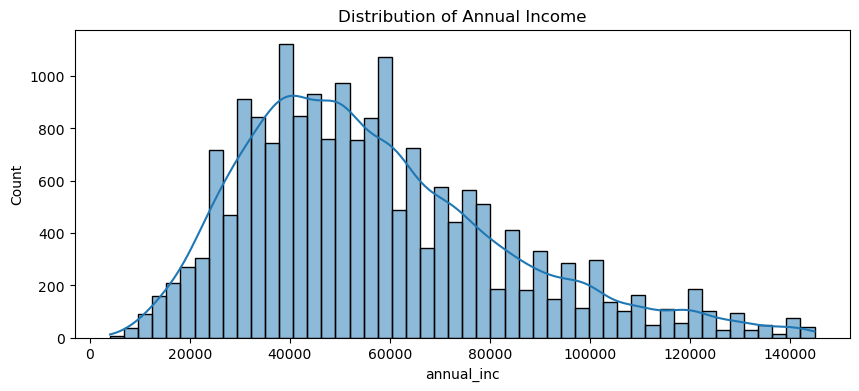

In [108]:
# Distribution of annual income

plt.figure(figsize=(10, 4))
sns.histplot(df_merge['annual_inc'], bins=50, kde=True)
plt.title('Distribution of Annual Income')
plt.show()

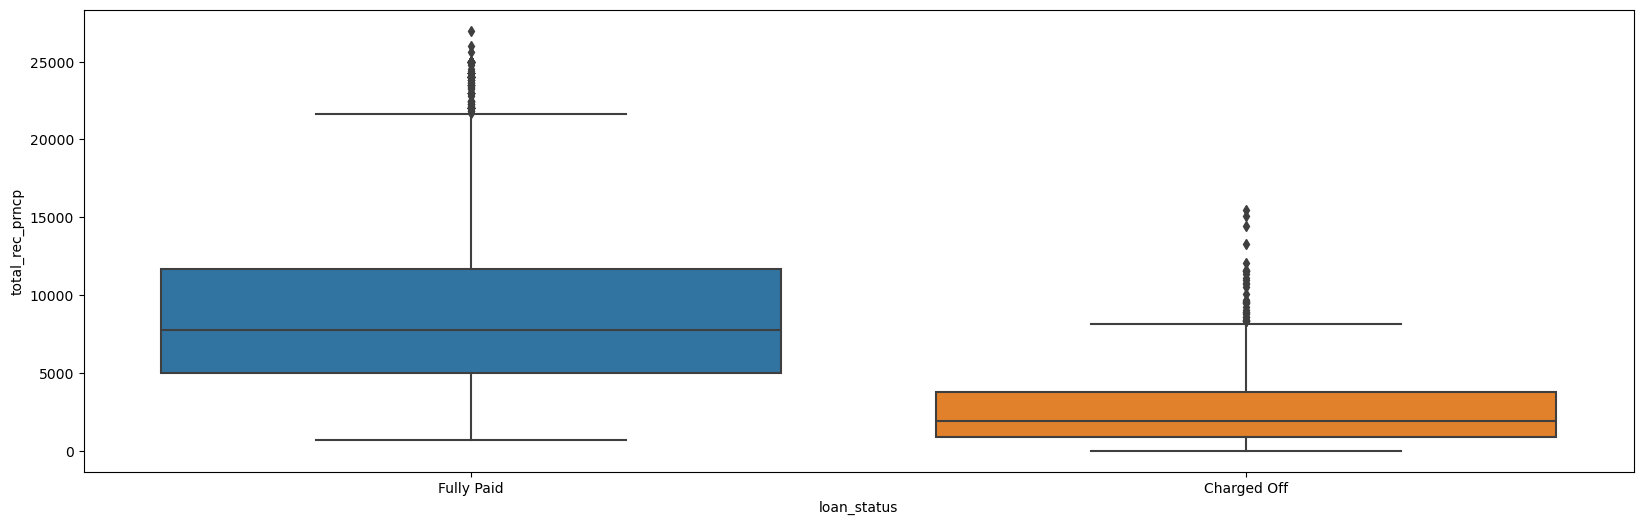

In [109]:
#The people who generally paid the Principal received to date will pay off the loan 
desc_order=df_merge['loan_status'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(20, 6))
sns.boxplot(x='loan_status', y='total_rec_prncp', data=df_merge,order=desc_order.index)
plt.show()

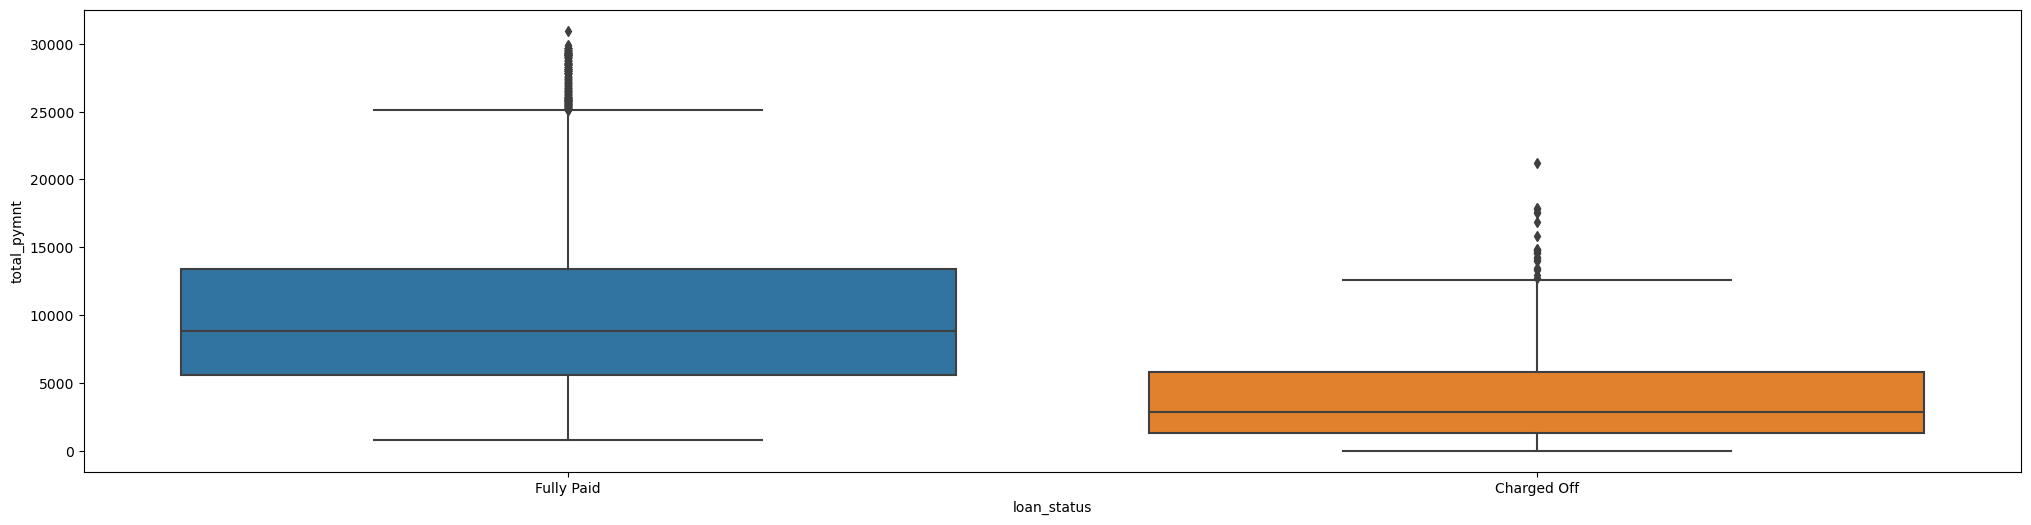

In [110]:
#People with high Income generally pay off the loan 
desc_order=df_merge['loan_status'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(25, 6))
sns.boxplot(x='loan_status', y='total_pymnt', data=df_merge,order=desc_order.index)
plt.show()

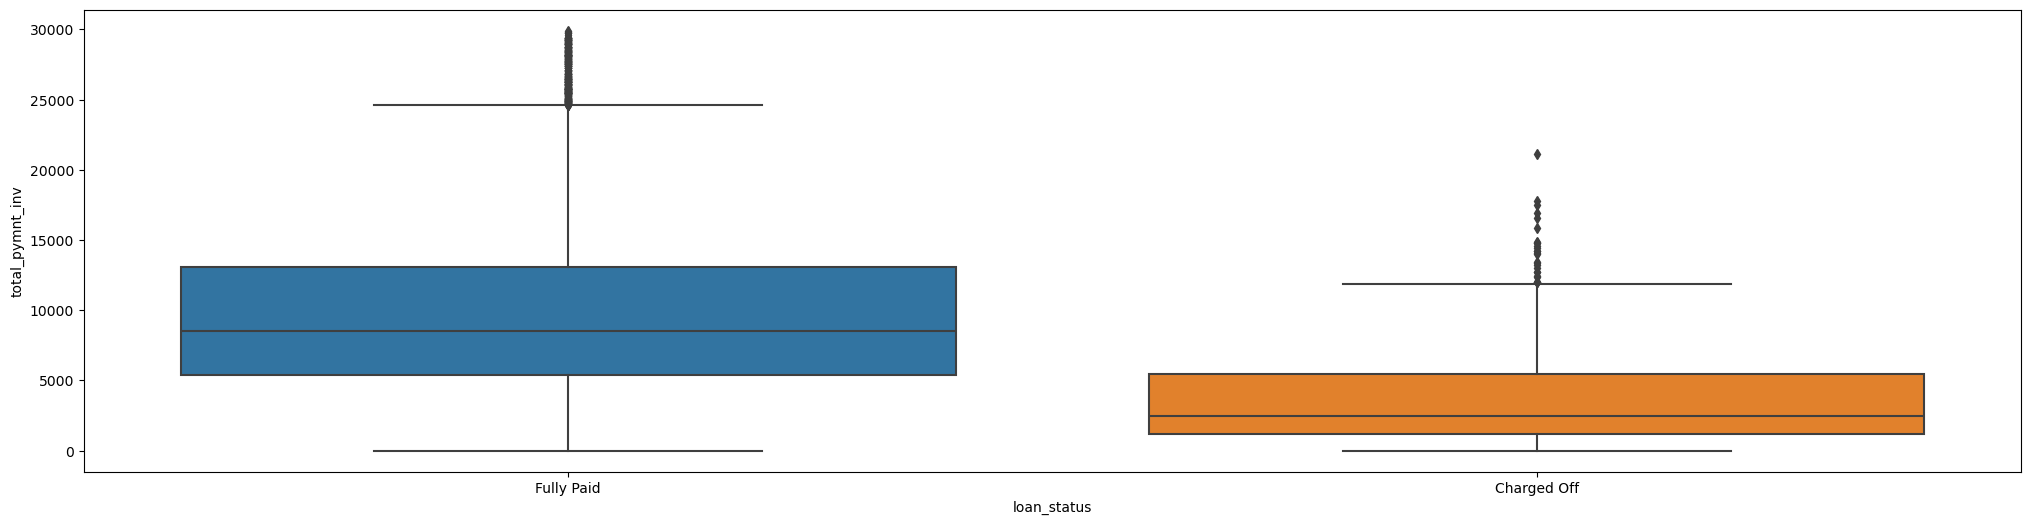

In [111]:
#People with high Income generally pay off the loan 
desc_order=df_merge['loan_status'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(25, 6))
sns.boxplot(x='loan_status', y='total_pymnt_inv', data=df_merge,order=desc_order.index)
plt.show()

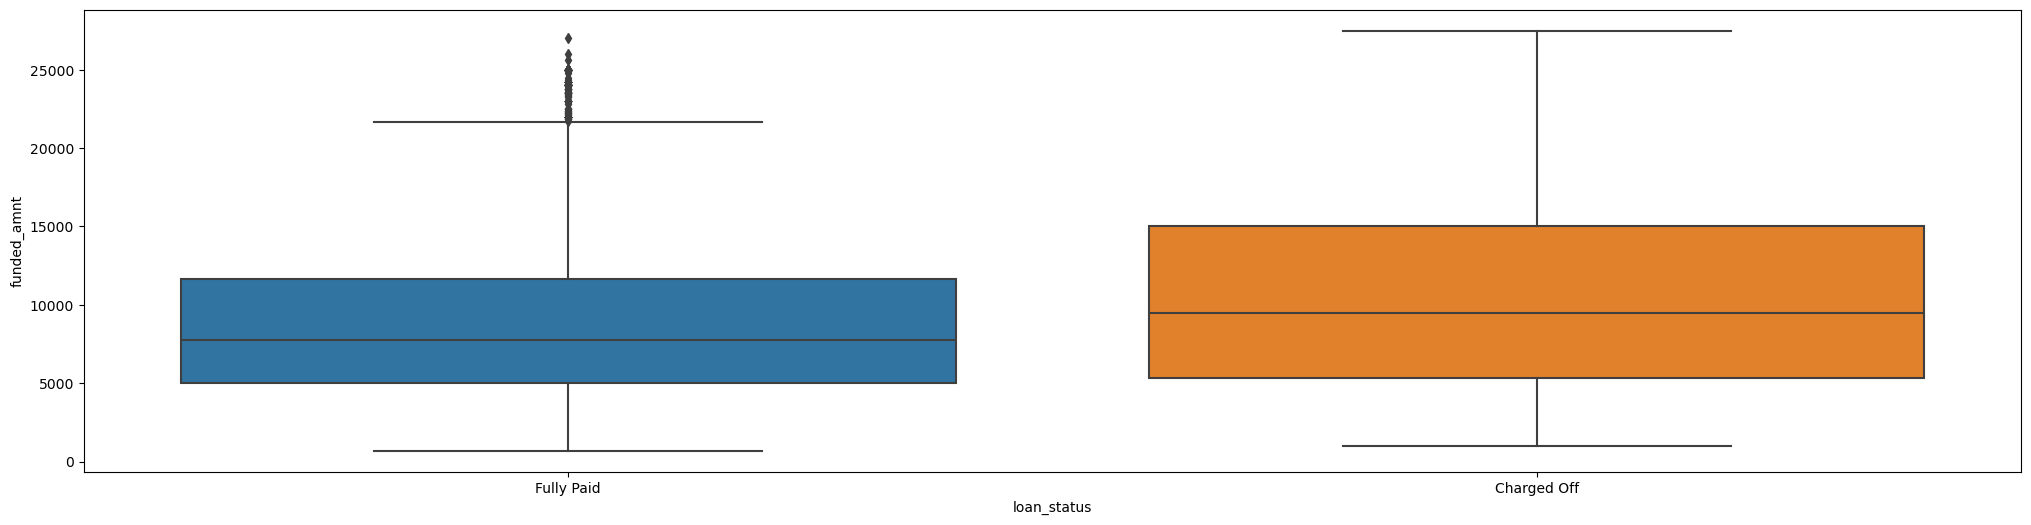

In [112]:
#People with high Income generally pay off the loan 
desc_order=df_merge['loan_status'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(25, 6))
sns.boxplot(x='loan_status', y='funded_amnt', data=df_merge,order=desc_order.index)
plt.show()

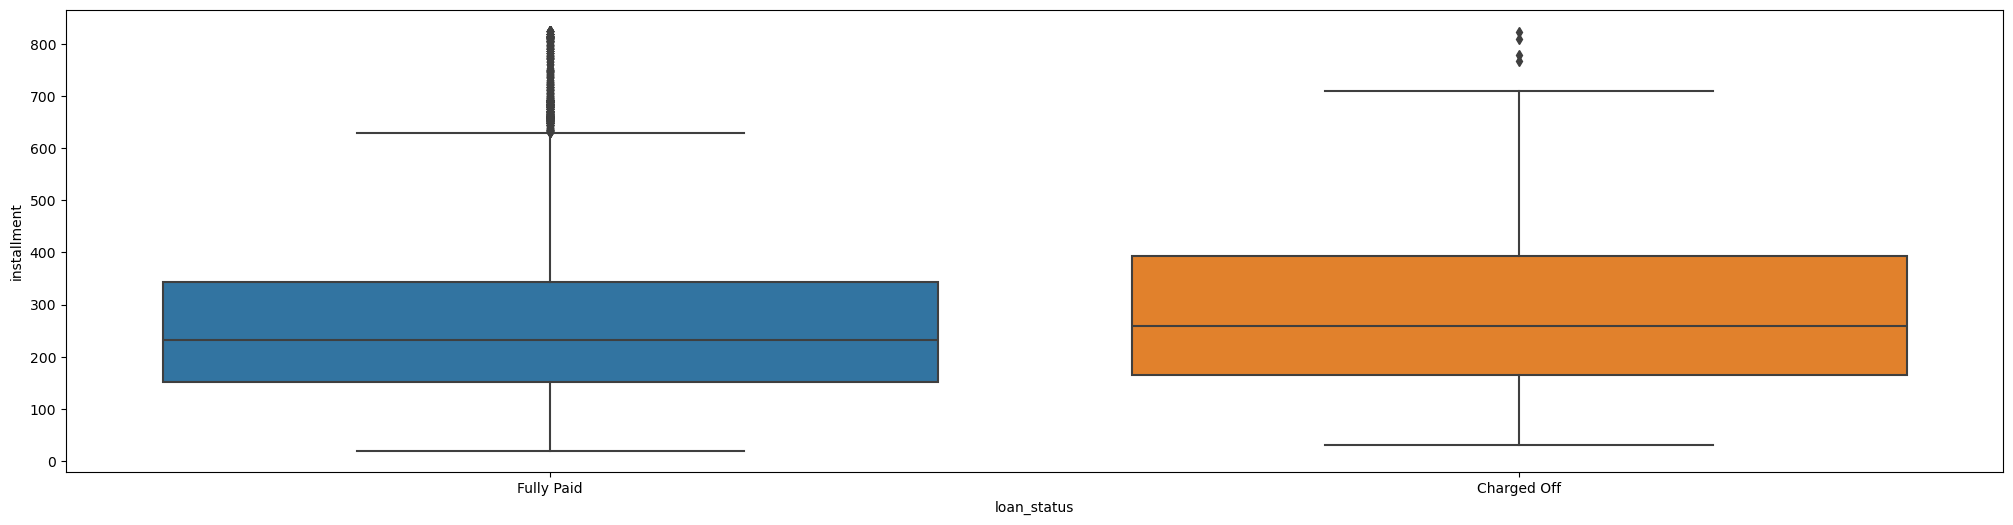

In [113]:
#People with high Income generally pay off the loan 
desc_order=df_merge['loan_status'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(25, 6))
sns.boxplot(x='loan_status', y='installment', data=df_merge,order=desc_order.index)
plt.show()

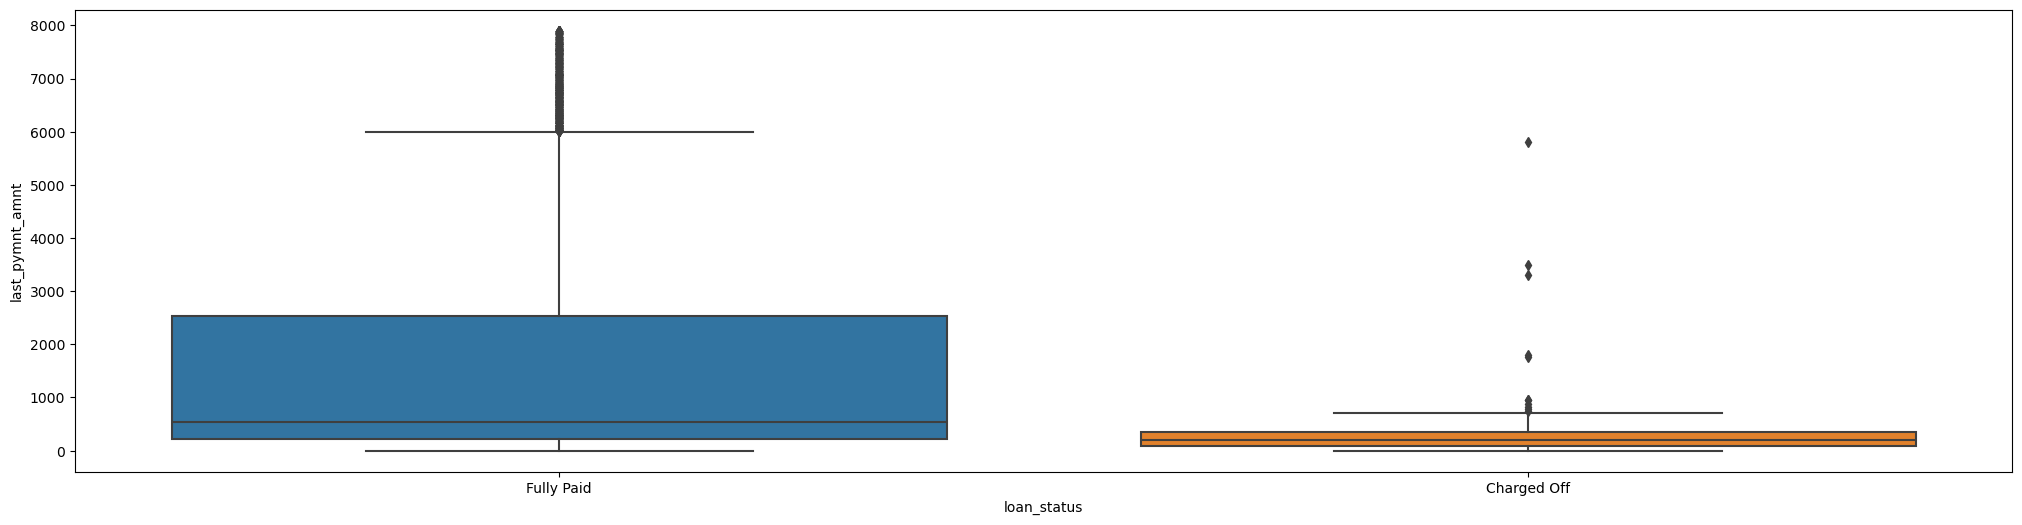

In [114]:
desc_order=df_merge['loan_status'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(25, 6))
sns.boxplot(x='loan_status', y='last_pymnt_amnt', data=df_merge,order=desc_order.index)
plt.show()

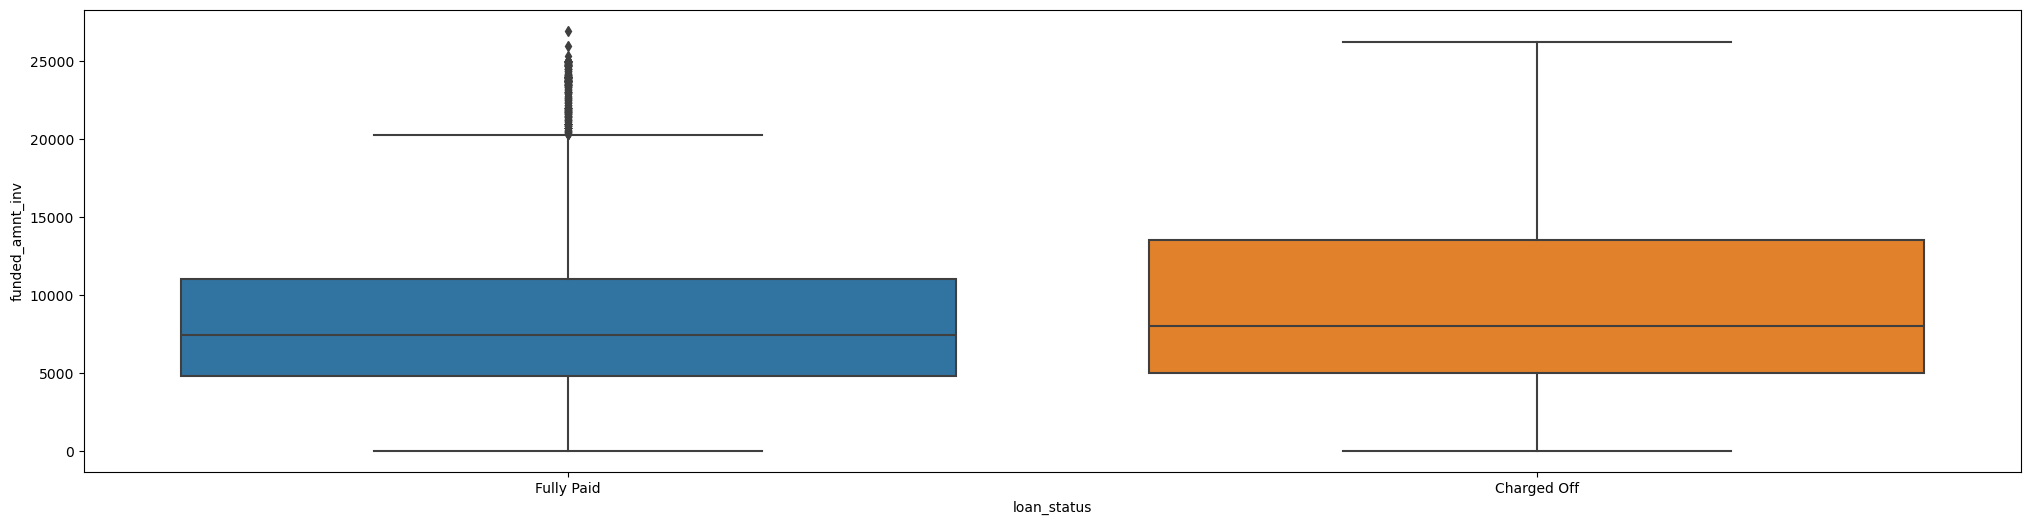

In [115]:
desc_order=df_merge['loan_status'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(25, 6))
sns.boxplot(x='loan_status', y='funded_amnt_inv', data=df_merge,order=desc_order.index)
plt.show()

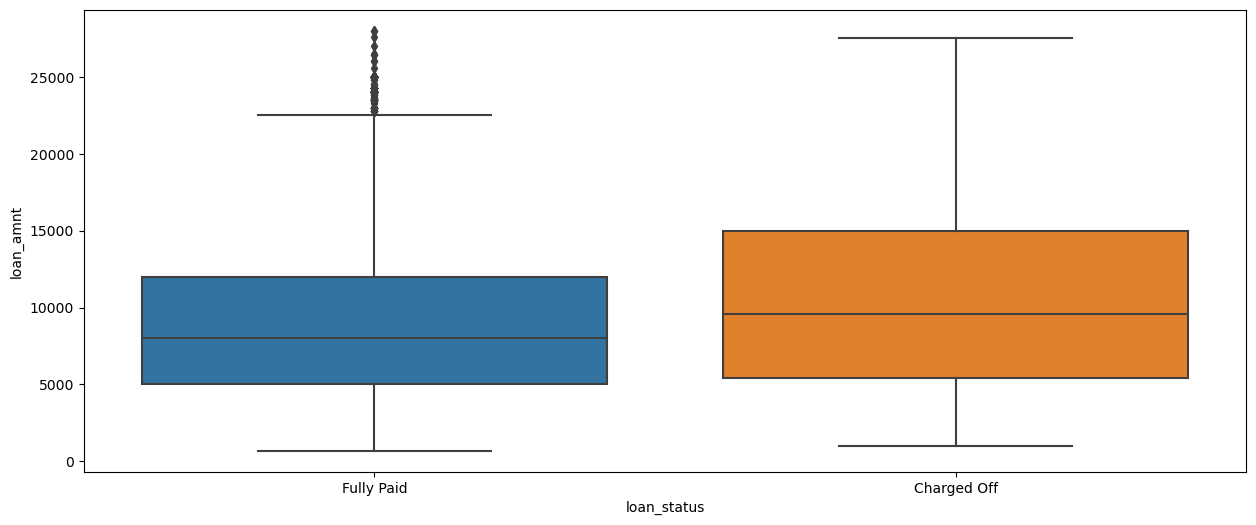

In [116]:
desc_order=df_merge['loan_status'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(15, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=df_merge,order=desc_order.index)
plt.show()

C:\Users\Sourish\AppData\Local\Temp\ipykernel_84400\3558572678.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{tick * 100:.1f}' for tick in y_ticks])


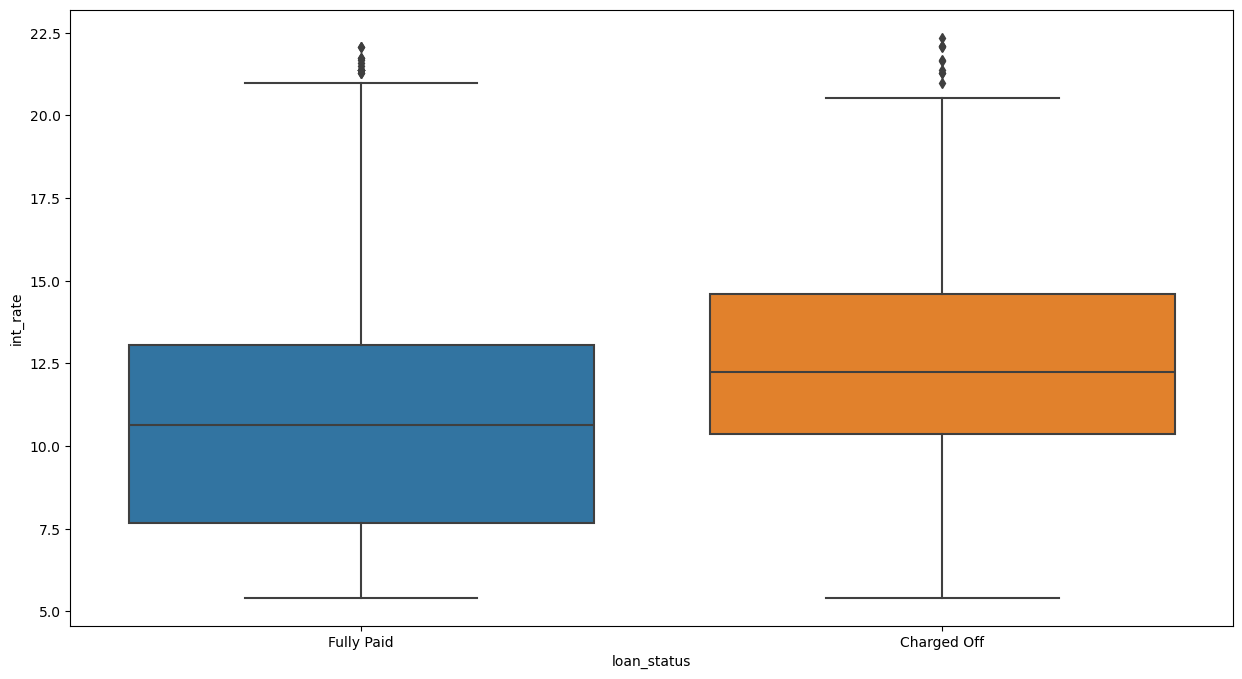

In [117]:
#Charged has more interest rates than the Fully Paid 
desc_order=df_merge['loan_status'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(15, 8))
sns.boxplot(x='loan_status', y='int_rate', data=df_merge,order=desc_order.index)
ax = plt.gca()
y_ticks = ax.get_yticks()
ax.set_yticklabels([f'{tick * 100:.1f}' for tick in y_ticks])
plt.show()

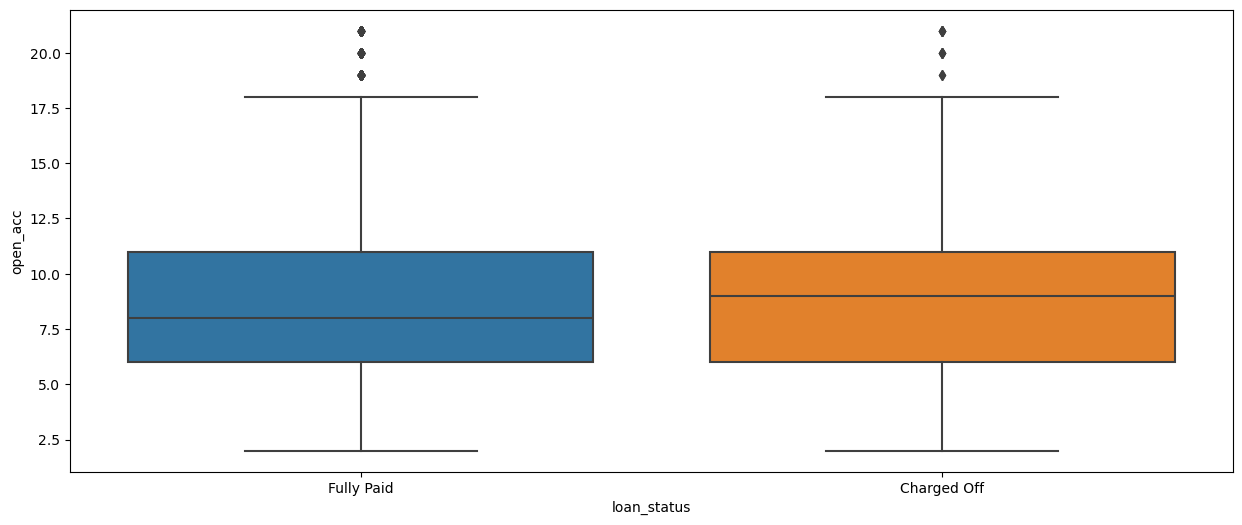

In [118]:
#Open_accounts are similar for the Fully paid and Charged off although the median is higher for charged off
desc_order=df_merge['loan_status'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(15, 6))
sns.boxplot(x='loan_status', y='open_acc', data=df_merge,order=desc_order.index)
plt.show()

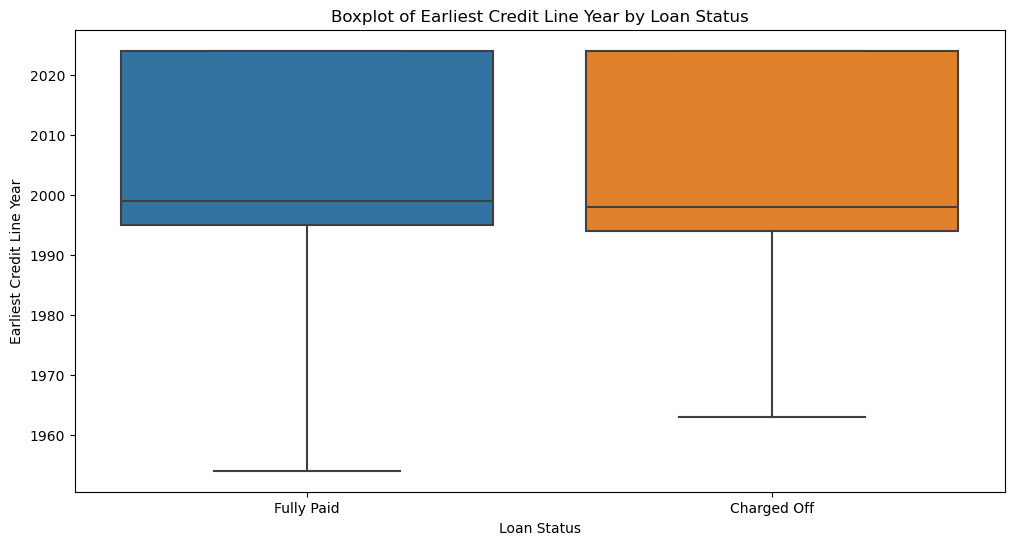

In [119]:
#The charged off  has earliest credit lines
df_merge['earliest_cr_line_yearr'] = df_merge['earliest_cr_line'].dt.year
plt.figure(figsize=(12, 6))
sns.boxplot(x='loan_status', y='earliest_cr_line_yearr', data=df_merge)
plt.xlabel('Loan Status')
plt.ylabel('Earliest Credit Line Year')
plt.title('Boxplot of Earliest Credit Line Year by Loan Status')
plt.show()

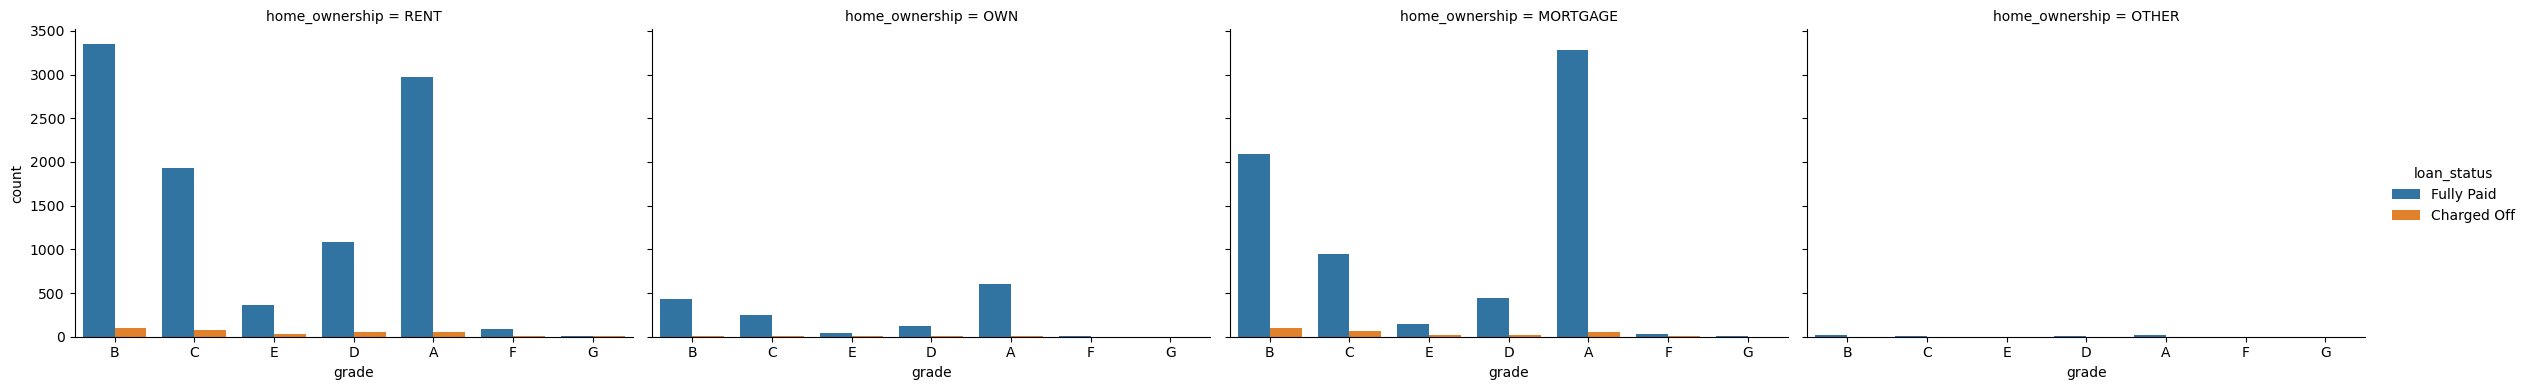

In [120]:
# Grade vs Loan status
grade_wise_status = sns.catplot(
    x='grade',
    hue='loan_status',
    col='home_ownership',
    data=df_merge,
    kind='count', # 'count' will count occurances of each category
    height=4,     # height of each facet
    aspect=1.5)   # aspect ratio
plt.show()

C:\Users\Sourish\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Sourish\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


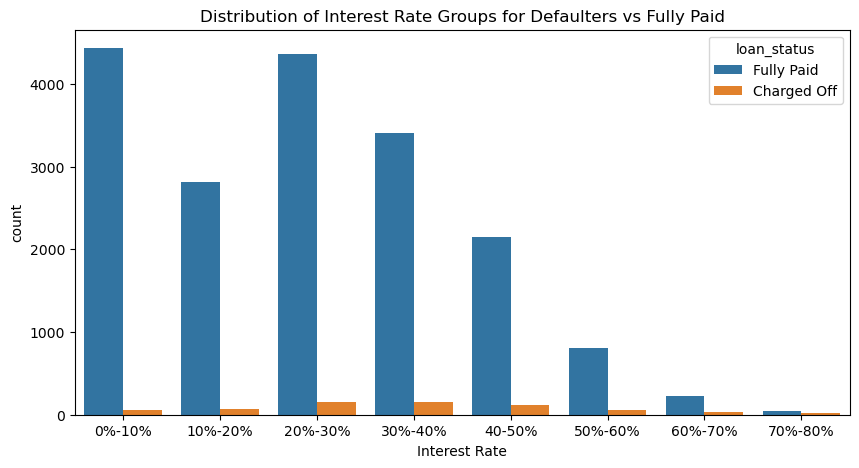

In [121]:
# Distribution of Interest Rate Groups for Defaulters vs Fully Paid

df_merge['int_rate_gr'] = pd.cut(df_merge['int_rate'], bins=8, precision=0, labels=['0%-10%', '10%-20%', '20%-30%', '30%-40%', '40-50%', '50%-60%', '60%-70%', '70%-80%'])
plt.figure(figsize=(10,5))
sns.countplot(data=df_merge, x='int_rate_gr', hue='loan_status')
plt.title('Distribution of Interest Rate Groups for Defaulters vs Fully Paid')
plt.xlabel('Interest Rate')
plt.show()

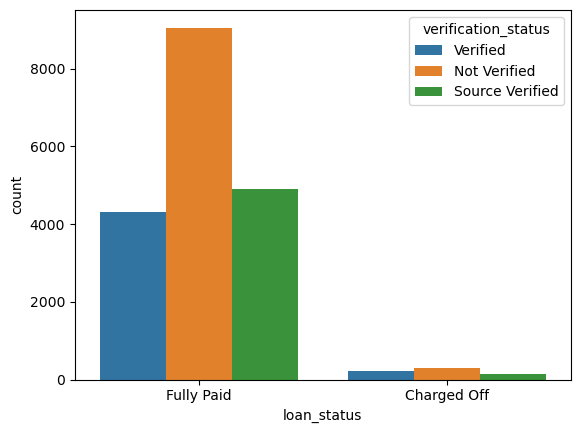

In [122]:
# Verified income w.r.t loan status

sns.countplot(x='loan_status', hue='verification_status', data=df_merge)
plt.show()

## To find the percentage of each category (fully paid and charged off) within each term category (36 months and 60 months)

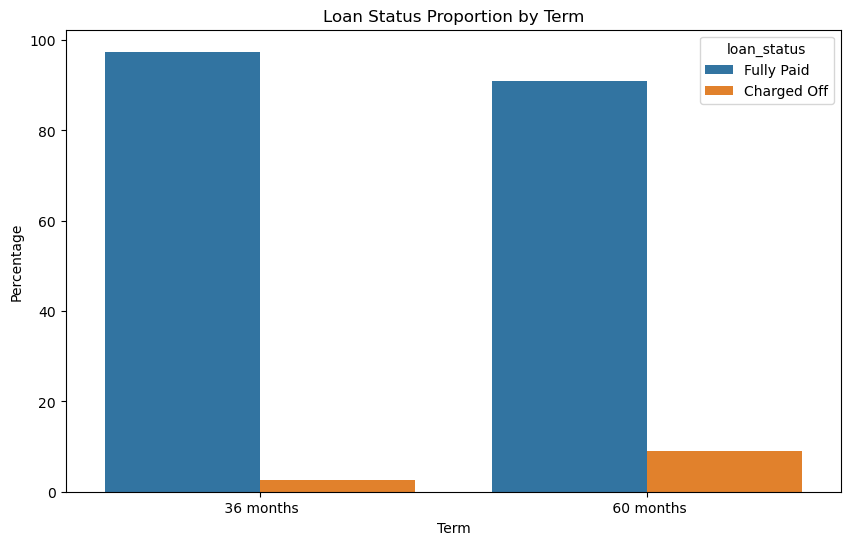

In [123]:
## Defaulters generally take the loan amount for 60 months

# Calculate total counts for each 'term' category
term_counts = df_merge['term'].value_counts()

# Calculate counts of 'loan_status' within each 'term' category
status_counts = df_merge.groupby('term')['loan_status'].value_counts()

# Calculate percentages
percentages = status_counts / term_counts * 100

# Convert percentages to a DataFrame
percentages_df = percentages.reset_index(name='percentage')

# countplot with percentages
plt.figure(figsize=(10, 6))
sns.barplot(x='term', y='percentage', hue='loan_status', data=percentages_df)
plt.title('Loan Status Proportion by Term')
plt.ylabel('Percentage')
plt.xlabel('Term')
plt.show()


In [124]:
df_merge.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'int_rate', 'installment', 'annual_inc', 'issue_d', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'policy_code', 'pub_rec_bankruptcies', 'term',
       'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'verification_status', 'loan_status', 'pymnt_plan', 'url', 'desc',
       'purpose', 'title', 'zip_code', 'addr_state', 'initial_list_status',
       'application_type', 'earliest_cr_line_yearr', 'int_rate_gr'],
      dtype='object')

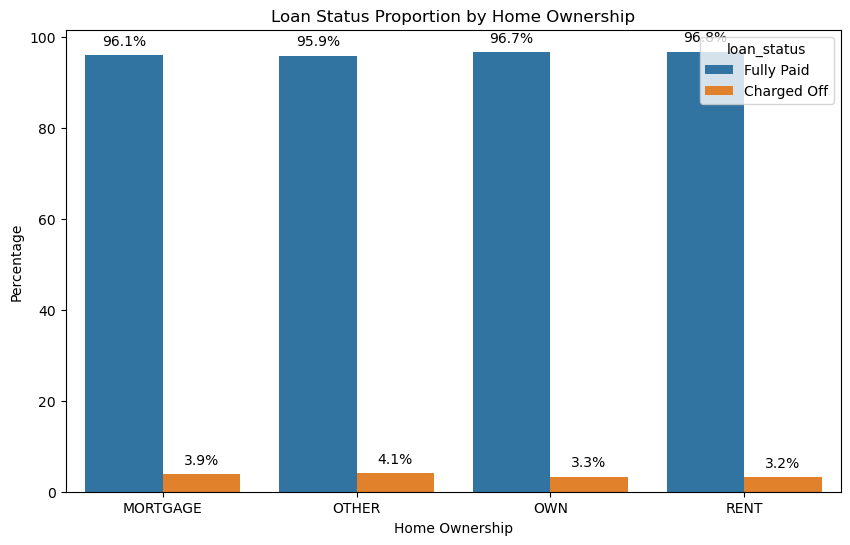

In [125]:
# Calculate total counts for each 'home_ownership' category
home_counts = df_merge['home_ownership'].value_counts()

# Calculate counts of 'loan_status' within each 'home_ownership' category
status_counts = df_merge.groupby('home_ownership')['loan_status'].value_counts()

# Calculate percentages
percentages = (status_counts / status_counts.groupby(level=0).sum()) * 100

# Convert percentages to a DataFrame
percentages_df = percentages.reset_index(name='percentage')

# Plot the barplot with percentages shown on top
plt.figure(figsize=(10, 6))
sns.barplot(x='home_ownership', y='percentage', hue='loan_status', data=percentages_df)

# Add percentage labels on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Loan Status Proportion by Home Ownership')
plt.ylabel('Percentage')
plt.xlabel('Home Ownership')
plt.show()
